In [1]:
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels as st # with statsmodels library patsy library also get installed
import numpy as np
import pandas as pd
import csv as c
import os


In [2]:
help(sn) ### to see the package contains data

Help on package seaborn:

NAME
    seaborn - # Capture the original matplotlib rcParams

PACKAGE CONTENTS
    algorithms
    apionly
    axisgrid
    categorical
    cm
    colors (package)
    conftest
    distributions
    external (package)
    linearmodels
    matrix
    miscplot
    palettes
    rcmod
    regression
    relational
    tests (package)
    timeseries
    utils
    widgets

DATA
    __warningregistry__ = {'version': 19}
    crayons = {'Almond': '#EFDECD', 'Antique Brass': '#CD9575', 'Apricot':...
    xkcd_rgb = {'acid green': '#8ffe09', 'adobe': '#bd6c48', 'algae': '#54...

VERSION
    0.10.0

FILE
    c:\users\jaber\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\__init__.py




# Loading The Directory Files

In [3]:
files_data = [file for file in os.listdir(r"C:\Users\Jaber\Documents\Python Practice Programm\Python Seaborn\seaborn-data-master")]

for files in files_data :
    print(files)

anscombe.csv
attention.csv
brain_networks.csv
car_crashes.csv
diamonds.csv
dots.csv
exercise.csv
flights.csv
fmri.csv
gammas.csv
iris.csv
mpg.csv
planets.csv
png
process
raw
README.md
tips.csv
titanic.csv


# Loading The Data Set 

### Working With The Diamonds Data

In [4]:
data = sn.load_dataset(name = 'diamonds') # this data is basically get from official seaborn statiscal data from github 
data.head(10)

carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39

# Use set() to specify the style to the plot

In [15]:
sn.set(color_codes=True) # color_codes = True provides the grid to the figure, otherwise if its not setter then have no grid

# Working With Point Plots Or Unvariate(having 1 Variate) Distributions

    '''
        The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. 
        By default, this will draw a histogram and fit a kernel density estimate (KDE).
        
        Rather you can also set the kde , rug , hist for the plots
    
    '''

### Working With Distribution Plots

In [7]:
# use distplot()
try :
    x = sn.distplot(data[price]) 
    x
except Exception as e :
    print(e) # getting this error because here the column is basically a string type not a variable nor index
    

name 'price' is not defined


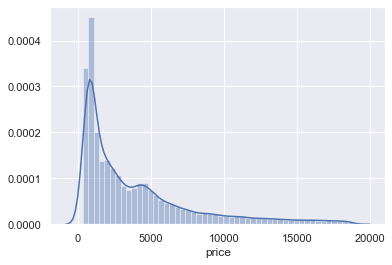

In [9]:
x = sn.distplot(data['price'])
x

### DistPlot With Specified Color 

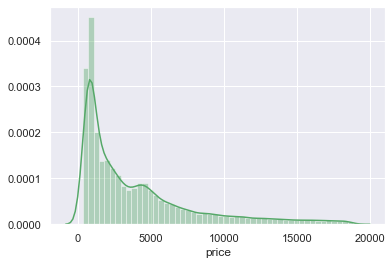

In [10]:
x = sn.distplot(data['price'] , color = 'g')
x

color kwarg must have one color per data set. 1 data sets and 2 colors were provided


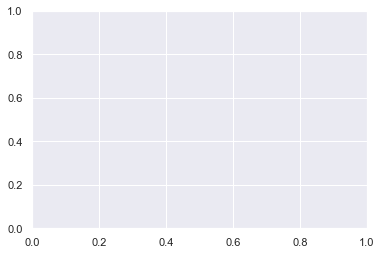

In [11]:
try :
    x = sn.distplot(a = data['price'], color = ['g', 'r'])

except Exception as e :
    print(e)

### Distribution Plot Withoud the kde line plot

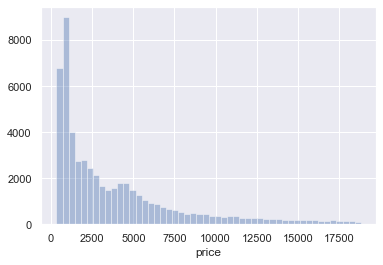

In [12]:
x = sn.distplot(a = data['price'], kde =False )

### Distplot In Vertical Axis

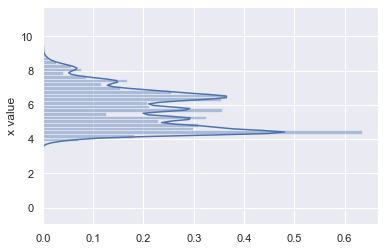

In [13]:
x = sn.distplot(a = data['x'], bins = 50, vertical = True, axlabel = 'x value' , label = 'x' )

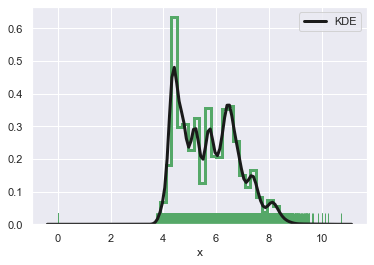

In [14]:
 ax = sn.distplot(a = data['x'], rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "g"}
                  )
ax

### With Numpy Array

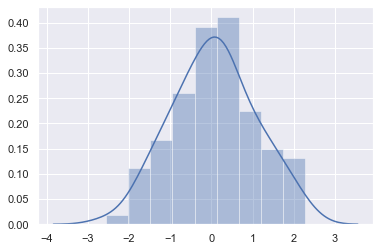

In [15]:
import seaborn as sn


# setting seed value
np.random.seed(0)

x = np.random.randn(100) # creating an array of random numbers
ax = sn.distplot(a = x)

### With Random Numbers

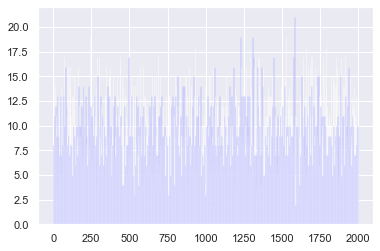

In [16]:
x = np.random.randint(1, 2000, 10000)
x1 = sn.distplot(a = x , color = '#0000FF', kde = False, bins = 1000)

### Specifying the rugplot inside the Histrogram Plot

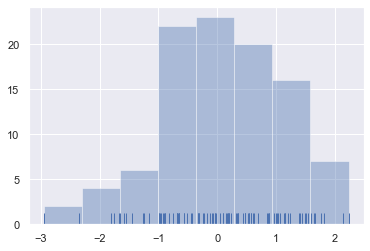

In [17]:
x = np.random.normal(size=100)
z = sn.distplot(x, kde = False, rug = True)


### Now Setting the bins

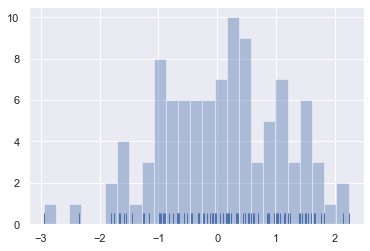

In [18]:
z1 = sn.distplot(x, bins=25, kde=False, rug=True);

### Flights Data With Pandas Series

In [2]:
### With Pandas Series
sf = pd.read_csv(r'C:\Users\Jaber\Documents\Python Practice Programm\Python Seaborn\seaborn-data-master\flights.csv')
sf.head(10)

year      month  passengers
0  1949    January         112
1  1949   February         118
2  1949      March         132
3  1949      April         129
4  1949        May         121
5  1949       June         135
6  1949       July         148
7  1949     August         148
8  1949  September         136
9  1949    October         119

In [26]:
## Now make Series out of it
passgr = pd.Series(data = sf['passengers'])
passgr.head(10)

0    112
1    118
2    132
3    129
4    121
5    135
6    148
7    148
8    136
9    119
Name: passengers, dtype: int64

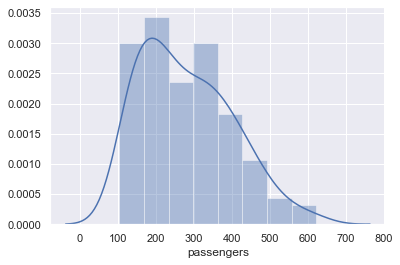

In [27]:
f = sn.distplot(a = passgr)

# Fitting parametric distributions
    '''
        You can also use distplot() to fit a parametric distribution to a dataset and visually evaluate,
        how closely it corresponds to the observed data.
    '''

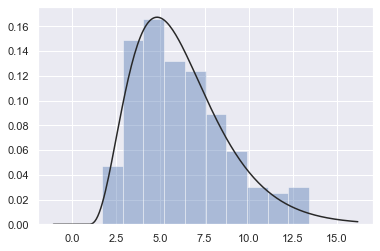

In [28]:
x = np.random.gamma(shape = 6, size=200) #Display the histogram of the samples, along with density fucntion kde
                                          #the probability density function
sn.distplot(x, kde=False, fit=stats.gamma)

# Working With KDE(Kernel density estimation) Plot
    
    '''
          The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of
          a  distribution. Like the histogram, the KDE plots encode the density of observations on one axis with height
          along the other axis.
    
    '''

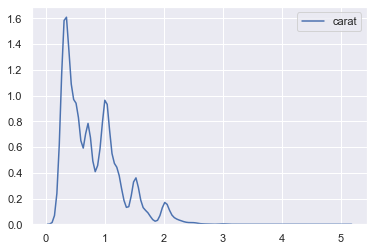

In [29]:
x = sn.kdeplot(data['carat'])

### With Different Color & Shade

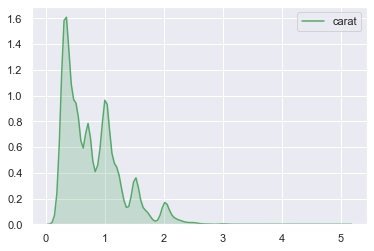

In [30]:
x = sn.kdeplot(data  = data['carat'], color = 'g', shade = True) # its provides a legend too

### Kde With Rug Plots By Specifying the distplot() just off the hist = False

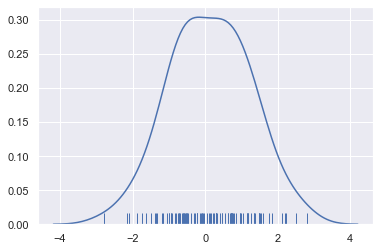

In [31]:
x = np.random.normal(size=100)
c = sn.distplot(x, hist=False, rug=True)

### With Generated Data Sets

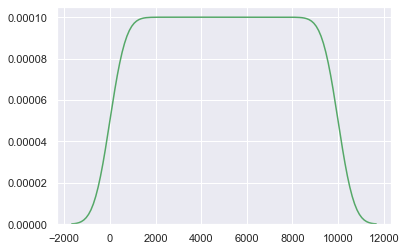

In [32]:
x = np.linspace(1,10000, 5000)
y = np.linspace(1, 10000, 5000)

data = sn.kdeplot(data = x , color = 'g')
data




# Working With Rug Plot

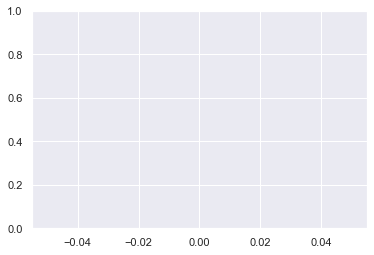

In [36]:
y = sn.rugplot(a = sf['passengers'], height = 0.17)


### With Random Numbers

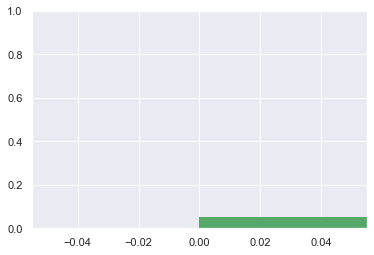

In [37]:
x = np.random.rand(1000000)
y = sn.rugplot(a = x, color = 'g')

### With Numpy Array 

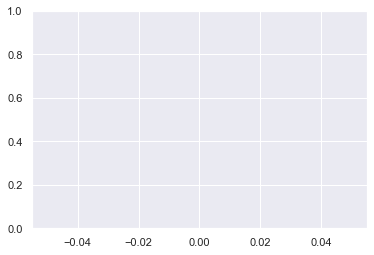

In [38]:
x = np.linspace(1, 10000, 500000)
y = sn.rugplot(a = x, color = 'g')

# Displot And KDE Plot Combined

'''
    The bandwidth (bw) parameter of the KDE controls how tightly the estimation is fit to the data,
    much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above.
    The default behavior tries to guess a good value using a common reference rule, 
    but it may be helpful to try larger or smaller values.

'''

### Process -1

No handles with labels found to put in legend.


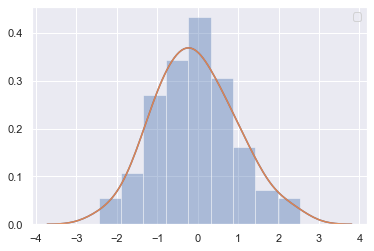

In [39]:
x = np.random.normal(size=100)
sn.distplot(x)
sn.kdeplot(x)
plt.legend();

### Process -2

No handles with labels found to put in legend.


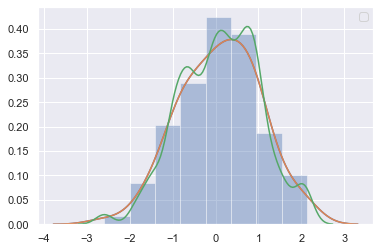

In [40]:
x = np.random.normal(size=100)
sn.distplot(x)
sn.kdeplot(x)
sn.kdeplot(x, bw=.2)
plt.legend();

### Process -3

No handles with labels found to put in legend.


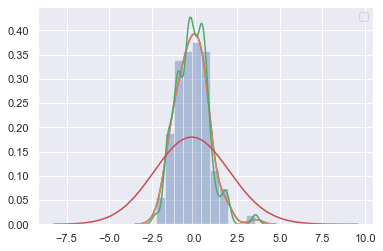

In [41]:
x = np.random.normal(size=100)
sn.distplot(x)
sn.kdeplot(x)
sn.kdeplot(x, bw=.2)
sn.kdeplot(x, bw=2)
plt.legend();

### Process-4

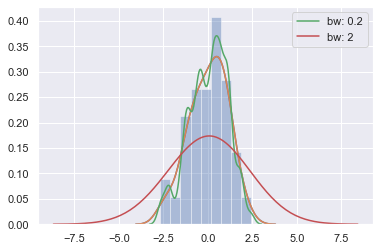

In [42]:
x = np.random.normal(size=100)
sn.distplot(x)
sn.kdeplot(x)
sn.kdeplot(x, bw=.2, label="bw: 0.2")
sn.kdeplot(x, bw=2,  label="bw: 2")
plt.legend();

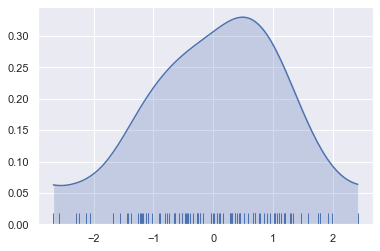

In [43]:
sn.kdeplot(x, shade=True, cut=0)
sn.rugplot(x)

# Working With Residual Plotting

In [9]:
df = sn.load_dataset('tips', cache = True)
df.head(10)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2

### Couting The Values  For The No. Of Smokers

In [11]:
df['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

### Without the lowest distribution

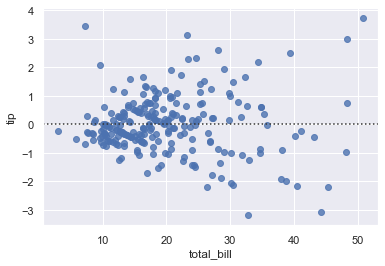

In [45]:
rsd = sn.residplot(x = 'total_bill' ,y = 'tip', data = df)

### Specifying the lowest distribution

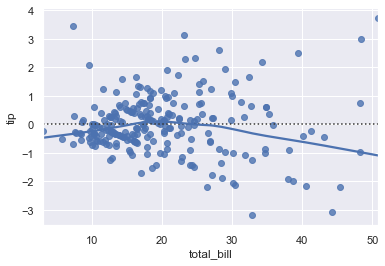

In [48]:
rsd1 = sn.residplot(x = 'total_bill' ,y = 'tip', data = df, lowess = True)

# Working With Barplot

### With Random Numbers Generated Data

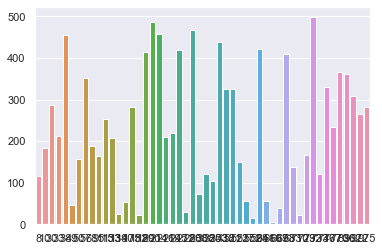

In [123]:
x = np.random.randint(1, 1000, 50)
y = np.random.randint(1, 500, 50)

try :
    pt = sn.barplot(x = x, y = y , ci ='sd')

except Exception as e :
    print(e)


### With Numpy Array

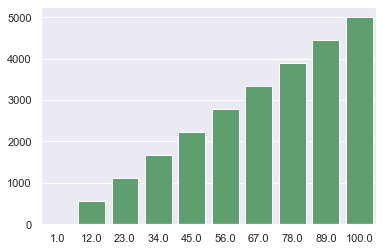

In [50]:
x = np.linspace(1, 100, 10)
y = np.linspace(5, 5000, 10)

z = sn.barplot(x = x, y = y, color = 'g')

### With CSV File From Github

In [51]:
flight = sn.load_dataset(name = 'flights') 
flight.head(10)

year      month  passengers
0  1949    January         112
1  1949   February         118
2  1949      March         132
3  1949      April         129
4  1949        May         121
5  1949       June         135
6  1949       July         148
7  1949     August         148
8  1949  September         136
9  1949    October         119

### Filtering the Year 1949 

In [52]:
flight[flight['year'] ==1949]

year      month  passengers
0   1949    January         112
1   1949   February         118
2   1949      March         132
3   1949      April         129
4   1949        May         121
5   1949       June         135
6   1949       July         148
7   1949     August         148
8   1949  September         136
9   1949    October         119
10  1949   November         104
11  1949   December         118

### Take Only the Year 1949  Months Then Work With That Data

In [53]:
mon = flight[flight['year'] ==1949]  
y = mon['month'].astype('str')
y

0       January
1      February
2         March
3         April
4           May
5          June
6          July
7        August
8     September
9       October
10     November
11     December
Name: month, dtype: object

In [54]:
pas = flight[flight['year'] ==1949] 

x = pas['passengers'].astype('int32')
x

0     112
1     118
2     132
3     129
4     121
5     135
6     148
7     148
8     136
9     119
10    104
11    118
Name: passengers, dtype: int32

### Taking out the year 1949 for Hue Data

In [55]:
year = flight[flight['year'] ==1949]  
y1= year['year']
y1

0     1949
1     1949
2     1949
3     1949
4     1949
5     1949
6     1949
7     1949
8     1949
9     1949
10    1949
11    1949
Name: year, dtype: int64

### Plot the months vs total_passengers data in the Bar Plot

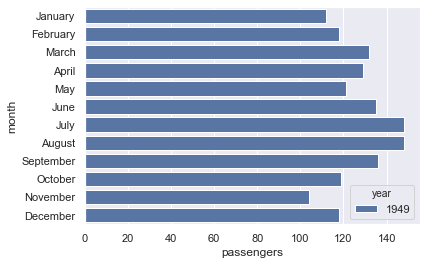

In [56]:
p = sn.barplot(x = x, y = y , data = flight, hue = y1)

### Ploting Through Overall The Year

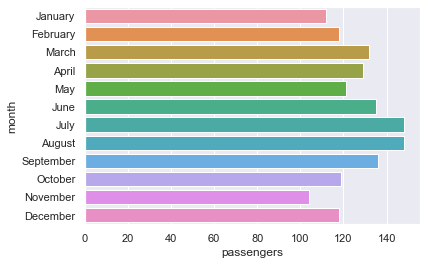

In [57]:
p = sn.barplot(x = x, y = y , data = flight)

### With Hue Specified

In [58]:
try : 
    yr = flight[flight['year']== 1949]
    #year = yr['year']
    flight['Real Time'] = pd.to_datetime(flight['year'])

    p = sn.barplot(x = x, y = y , data = flight, hue = yr)
except Exception as e :
    print(e)

could not broadcast input array from shape (12,3) into shape (12)


### Controlling Bar Order By Explicitly Defining it


In [59]:
try :
    tips = sn.load_dataset(name = 'tips')
    ax = sn.barplot(x="time", y="tip", data=tips, order=["Dinner", "Lunch"])
except Exception as e :
    print(e)

Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'


### Use median as the estimate of central tendency.

In [62]:
from numpy import median
try :
    ax = sn.barplot(x="day", y="tip", data=tips, estimator=median)
except Exception as e :
    print(e)

Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'


### Show standard deviation of observations instead of a confidence interval

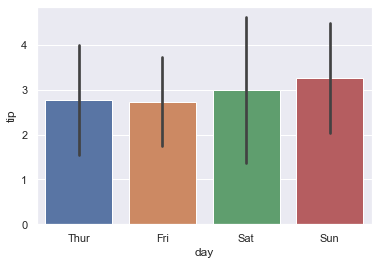

In [63]:
ax = sn.barplot(x="day", y="tip", data=tips, ci="sd")

### Show The Standard Error Of The Mean With The Error Bars

In [64]:
try :
    ax = sn.barplot(x="day", y="tip", data=tips, ci=68)
except Exception as e :
    print(e)

Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'


### Adding A Caps to the Error Bar

In [65]:
try :
    ax = sn.barplot(x="day", y="tip", data=tips, capsize=.2)
except Exception as e :
    print(e)

Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'


### Use a Different Color Palette for the Bars

In [66]:
try :
    ax = sn.barplot("size", y="total_bill", data=tips,  palette="Blues_d")
except Exception as e :
    print(e)

Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'


### Use Hue Without Changing Bar Position or Width

In [67]:
try :
    tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
    ax = sn.barplot(x="day", y="total_bill", hue="weekend", data=tips, dodge=False)
except Exception as e :
    print(e)

Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'


### Use matplotlib.axes.Axes.bar() parameters to control the style

In [68]:
try :
    ax = sn.barplot("day", "total_bill", data=tips, linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2")
except Exception as e :
    print(e)

Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'


### Plot the All the Bars With Same Color And Also Provide Saturation 

In [69]:
year = flight[flight['year'] ==1949]  
y1= year['year']
y1

0     1949
1     1949
2     1949
3     1949
4     1949
5     1949
6     1949
7     1949
8     1949
9     1949
10    1949
11    1949
Name: year, dtype: int64

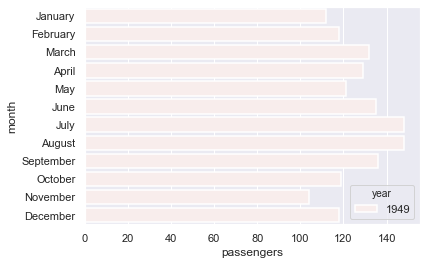

In [70]:

try :
    ax = sn.barplot(x = x, y= y , data=flight , color="#F99F9B", saturation=0.55, linewidth =1.5, hue = y1)
except Exception as e :
    print(e)


### Use catplot() to combine a barplot() and a FacetGrid. This allows grouping within additional categorical variables. 
### Using catplot() is safer than using FacetGrid directly, as it ensures synchronization of variable order across facets.

'NoneType' object is not callable


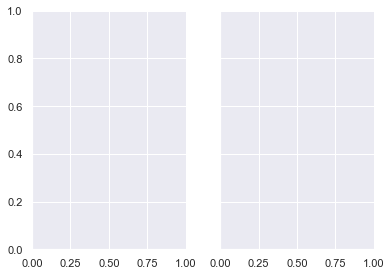

In [121]:
try :
    g = sn.catplot(x="sex", y="total_bill", hue="smoker", col="time", data=tips, kind="bar",estimator = None, height=4, aspect=.7)
except Exception as e :
    print(e)

# Work With Titanic CSV Files

In [72]:
titanic = sn.load_dataset(name = 'titanic')
titanic.head(10)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
5    man        True  NaN   Queenstown    no   True  
6    man        True    E  Southampton    no   True  
7  child       False  NaN  Southampton    no  False  
8  woman       False  NaN  Southampton   yes  False  
9  child       False  NaN    Cherbourg   yes  False

### Check The Dtypes for the DataFrame Each Column

In [73]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

### Now Plot the Bar Plot

In [74]:
s = titanic['sex'].astype('str')
s

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [76]:
f = titanic['fare'].astype('float64')
f

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

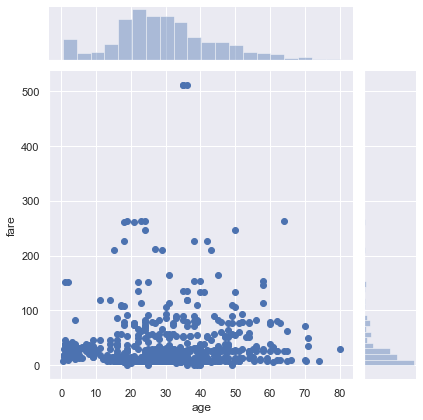

In [77]:
x = sn.jointplot(x ='age' , y = 'fare' , data = titanic)
x

### With  Tips Data

In [78]:
tips = sn.load_dataset("tips")
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [84]:
bill = tips['total_bill'].astype(dtype = 'int32')
b = bill[0:10].astype('int32')
b

0    16
1    10
2    21
3    23
4    24
5    25
6     8
7    26
8    15
9    14
Name: total_bill, dtype: int32

In [85]:
day = tips['day'].astype('str')
d =day[0:10]
d

0    Sun
1    Sun
2    Sun
3    Sun
4    Sun
5    Sun
6    Sun
7    Sun
8    Sun
9    Sun
Name: day, dtype: object

In [86]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

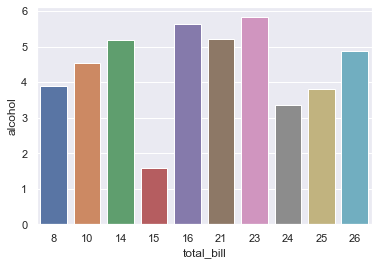

In [392]:
try :
    ax = sn.barplot(x= b , y= d , data=tips, ci = 'sd') # ci = 'sd' means off the bootstraping which helps to avoid cast array
                                                        # issue       
except Exception as e :
    print(e)

### With Pandas DataFrame

In [88]:
### With Pandas Series
df = pd.read_csv(r'C:\Users\Jaber\Documents\Python Practice Programm\Python Seaborn\seaborn-data-master\flights.csv')
df.head(10)

year      month  passengers
0  1949    January         112
1  1949   February         118
2  1949      March         132
3  1949      April         129
4  1949        May         121
5  1949       June         135
6  1949       July         148
7  1949     August         148
8  1949  September         136
9  1949    October         119

In [189]:
data = pd.DataFrame(data = df)
data

year      month  passengers
0    1949    January         112
1    1949   February         118
2    1949      March         132
3    1949      April         129
4    1949        May         121
..    ...        ...         ...
139  1960     August         606
140  1960  September         508
141  1960    October         461
142  1960   November         390
143  1960   December         432

[144 rows x 3 columns]

# Plotting Bivariate Distributions

    '''
        It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is 
        to just use the jointplot() function, which creates a multi-panel figure that shows both the bivariate (or joint)
        relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.
    
    '''

In [89]:
mean = [0, 1] 
covarience = [(1, 0.5), (0.5, 1)]
data = np.random.multivariate_normal(mean = mean, cov = covarience, size = 200)
df = pd.DataFrame(data, columns=["x", "y"])
df

x         y
0   -0.298905 -0.030283
1    0.135063  0.094088
2    1.711345  0.322478
3    0.336773  1.962676
4    1.002839  0.291907
..        ...       ...
195  0.832591  1.050405
196  0.550709  2.149979
197  0.158153  1.279116
198 -0.245950  0.050556
199 -0.470649  0.056418

[200 rows x 2 columns]

In [90]:
x1 = df['x']
x1 = x1[0:10]
x1

0   -0.298905
1    0.135063
2    1.711345
3    0.336773
4    1.002839
5    1.314112
6   -0.309281
7   -0.865980
8   -0.523885
9    0.455493
Name: x, dtype: float64

In [91]:
y1 = df['y']
y1 = y1[0:10]
y1

0   -0.030283
1    0.094088
2    0.322478
3    1.962676
4    0.291907
5    1.177058
6    1.227920
7    0.805818
8    1.681151
9    0.858407
Name: y, dtype: float64

### With Residual Plot

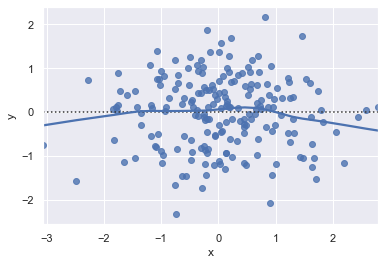

In [92]:
x = sn.residplot(x = 'x', y = 'y', data = df, lowess = True)

### With Bar Plot

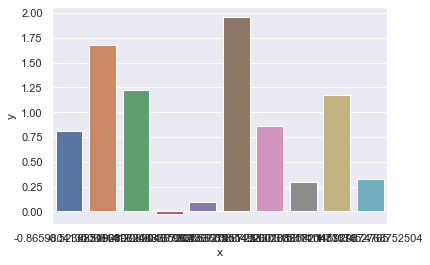

In [93]:
y = sn.barplot(x = x1 , y = y1, data = df)

# You can also draw a two-dimensional kernel density plot with the kdeplot() function.
### This allows you to draw this kind of plot onto a specific (and possibly already existing) matplotlib axes,
###  whereas the jointplot() function manages its own figure.

### Process-1 Creating The Subplots

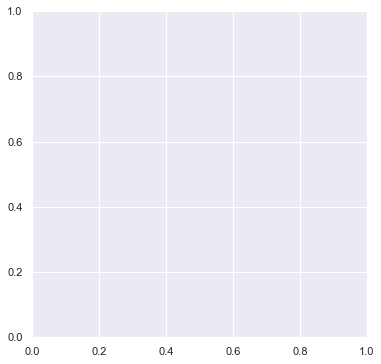

In [33]:
f, ax = plt.subplots(figsize=(6, 6))


### Process-2.

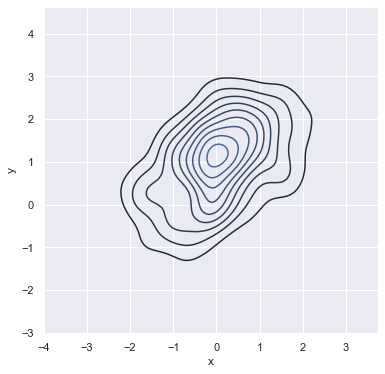

In [123]:
f, ax = plt.subplots(figsize=(6, 6))
sn.kdeplot(df.x, df.y, ax=ax)


### Process-3

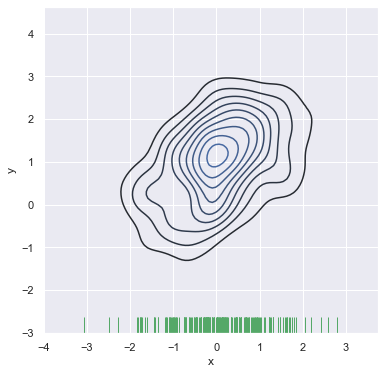

In [124]:
f, ax = plt.subplots(figsize=(6, 6))
sn.kdeplot(df.x, df.y, ax=ax)
sn.rugplot(df.x, color="g", ax=ax)


### Process-4.

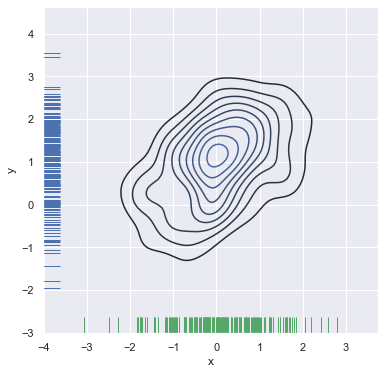

In [125]:
f, ax = plt.subplots(figsize=(6, 6))
sn.kdeplot(df.x, df.y, ax=ax)
sn.rugplot(df.x, color="g", ax=ax)
sn.rugplot(df.y, vertical=True, ax=ax)

# Scatterplots
 
     '''
     The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with 
     point at the x and y values. This is analogous to a rug plot on two dimensions. You can draw a scatterplot with 
     scatterplot(), and it is also the default kind of plot shown by the jointplot() function.
 
     '''

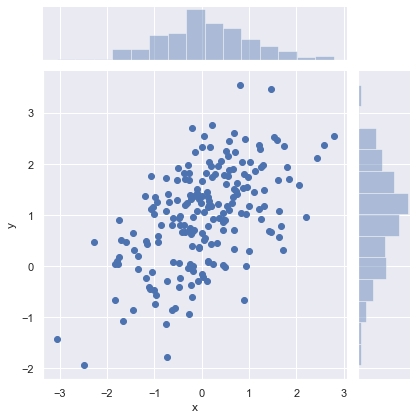

In [94]:
p = sn.jointplot(x="x", y="y", data=df)

# Working With Joint Plot

In [95]:
tips = sn.load_dataset(name = 'tips')
tips.head(10)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2

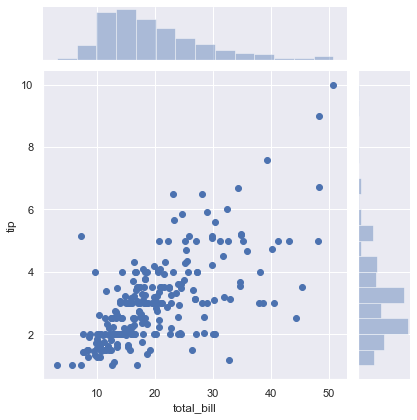

In [96]:
d = sn.jointplot( x = 'total_bill', y= 'tip' ,data = tips)

### Change the graph format to KDE Plot

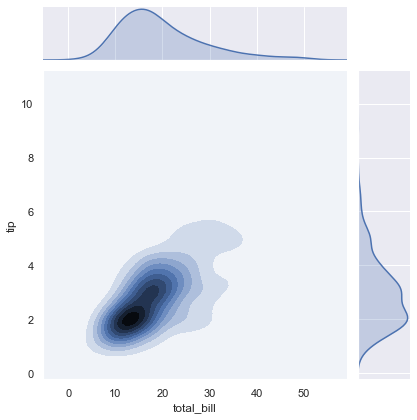

In [97]:
d = sn.jointplot( x = 'total_bill', y= 'tip' ,data = tips, kind = 'kde')

### Change the graph format to Hex Plot


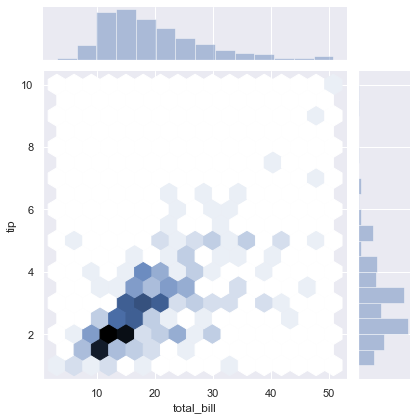

In [98]:
d = sn.jointplot( x = 'total_bill', y= 'tip' ,data = tips, kind = 'hex')

### Change the graph format to Regression Plot

Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'


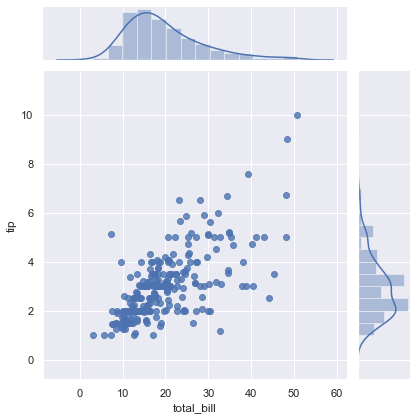

In [99]:
try :
    d = sn.jointplot( x = 'total_bill', y= 'tip' ,data = tips, kind = 'reg')
except Exception as e :
    print(e)

### Load the Car Crash Data Set

In [100]:
car_crash = sn.load_dataset(name = 'car_crashes')
car_crash.head(10)

total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   
5   13.6     5.032    3.808          10.744       12.920       835.50   
6   10.8     4.968    3.888           9.396        8.856      1068.73   
7   16.2     6.156    4.860          14.094       16.038      1137.87   
8    5.9     2.006    1.593           5.900        5.900      1273.89   
9   17.9     3.759    5.191          16.468       16.826      1160.13   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  
5      139.91     CO  
6      167.02     CT  
7      151.48     DE  
8      136.05     DC  
9      144.18     FL

In [101]:
car_crash.dtypes

total             float64
speeding          float64
alcohol           float64
not_distracted    float64
no_previous       float64
ins_premium       float64
ins_losses        float64
abbrev             object
dtype: object

In [126]:
c =pd.to_numeric(car_crash['speeding'])
c.astype('float64')
c.head(10)

0    7.332
1    7.421
2    6.510
3    4.032
4    4.200
5    5.032
6    4.968
7    6.156
8    2.006
9    3.759
Name: speeding, dtype: float64

In [127]:
d = pd.to_numeric(car_crash['alcohol'])
d.astype('float64')
d.head(10)

0    5.640
1    4.525
2    5.208
3    5.824
4    3.360
5    3.808
6    3.888
7    4.860
8    1.593
9    5.191
Name: alcohol, dtype: float64

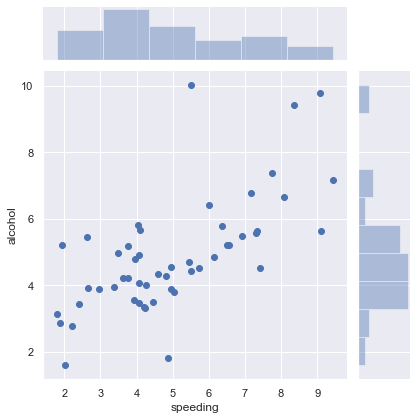

In [106]:
try :
    c = sn.jointplot(x = c ,y = d , data = car_crash )
except Exception as e :
    print(e)

# Working With Pair Plotting

In [107]:
iris_data = sn.load_dataset(name = 'iris')
iris_data.head(10)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa

### Normapl Plotting Without Hue

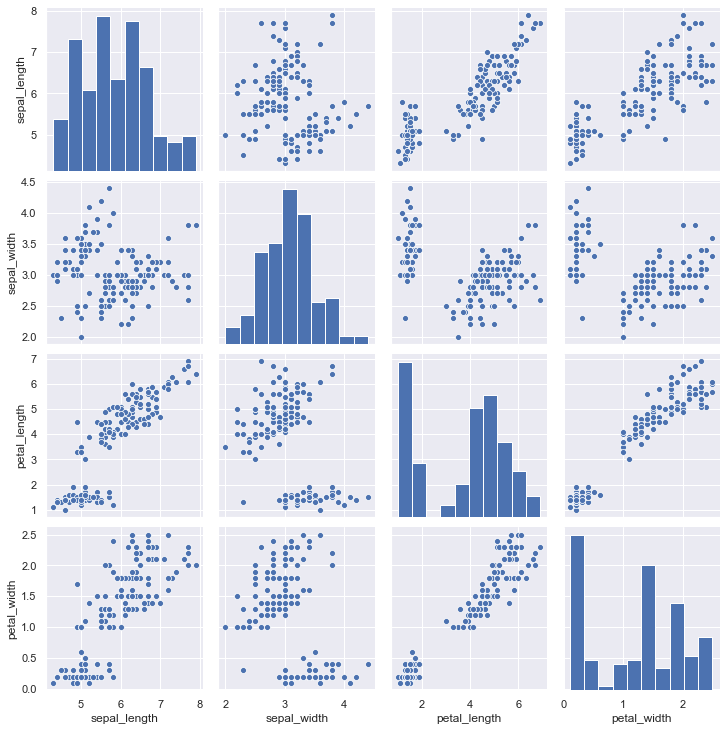

In [108]:
x = sn.pairplot(data = iris_data) # this will plots a subplots with 1 to 1 pair combination 

### Plotting With Hue Specified 

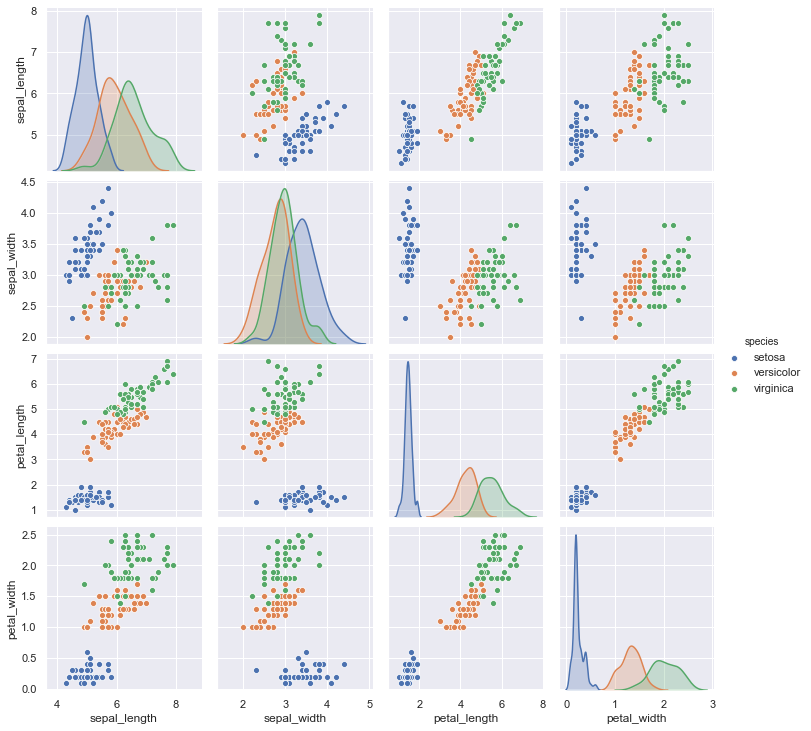

In [109]:
x = sn.pairplot(data = iris_data, hue = 'species')

### Map the Data Only for Diagonal Or The Diagonal Data to be Dist Plot

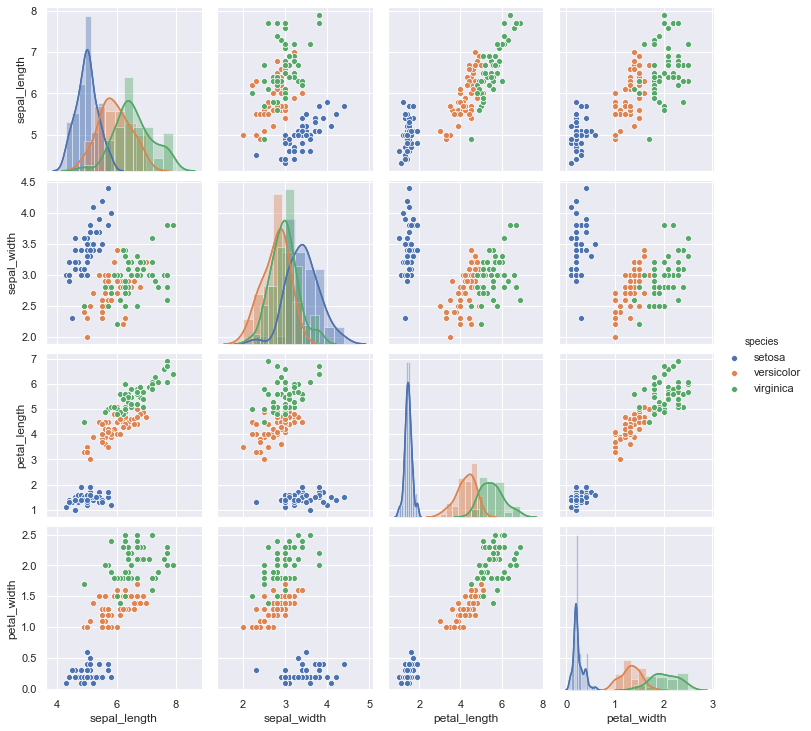

In [201]:
x = sn.pairplot(data = iris_data, hue = 'species')
x.map_diag(sn.distplot)

In [110]:
tips = sn.load_dataset(name = 'tips')
tips.head(10)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2

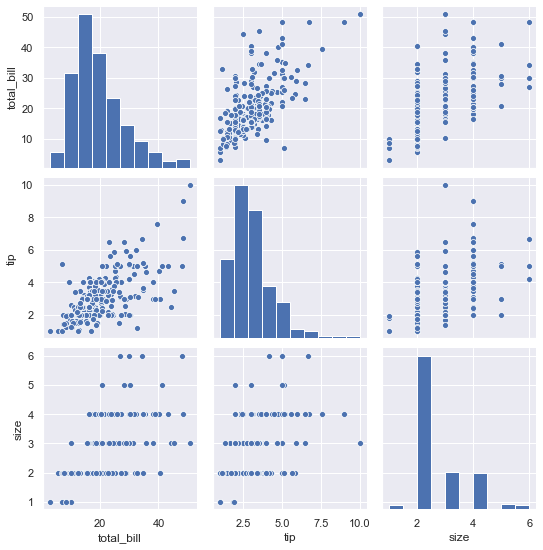

In [111]:
y = sn.pairplot(data =tips)

### Changes the Upper Data to be Kde Plot

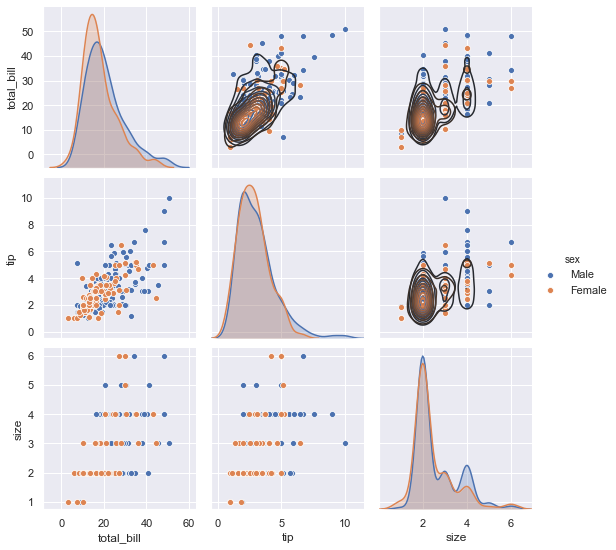

In [204]:
y = sn.pairplot(data = tips, hue = 'sex')
y.map_upper(sn.kdeplot)

### Much like the relationship between jointplot() and JointGrid,
### the pairplot() function is built on top of a PairGrid object, which can be used directly for more flexibility:

### Process -1 . First Make the Diagonal Kde Plots

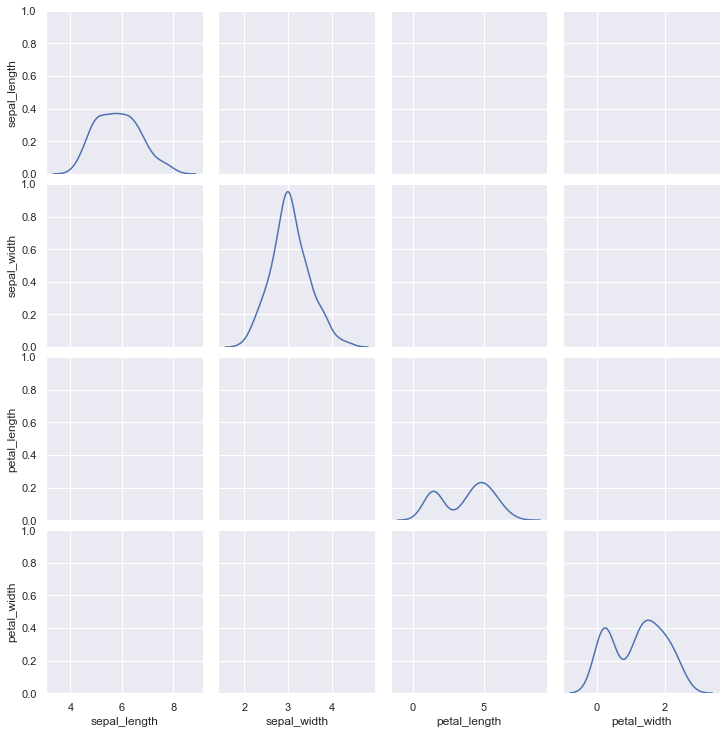

In [115]:
g = sn.PairGrid(iris_data) # creating PairGrid Object
g.map_diag(sn.kdeplot) # mapping the kdeplot digonal wise


### Process-2 . Now make the Off Diagonal  Kde Plots

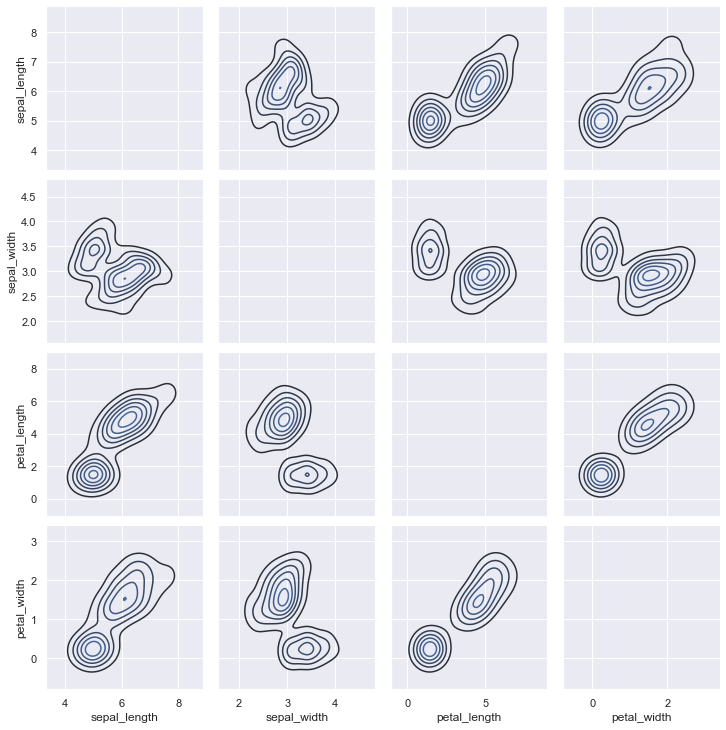

In [116]:
g = sn.PairGrid(iris_data) # creating PairGrid Object
g.map_offdiag(sn.kdeplot, n_levels=6)

### Process -3. Now Apply Both Together

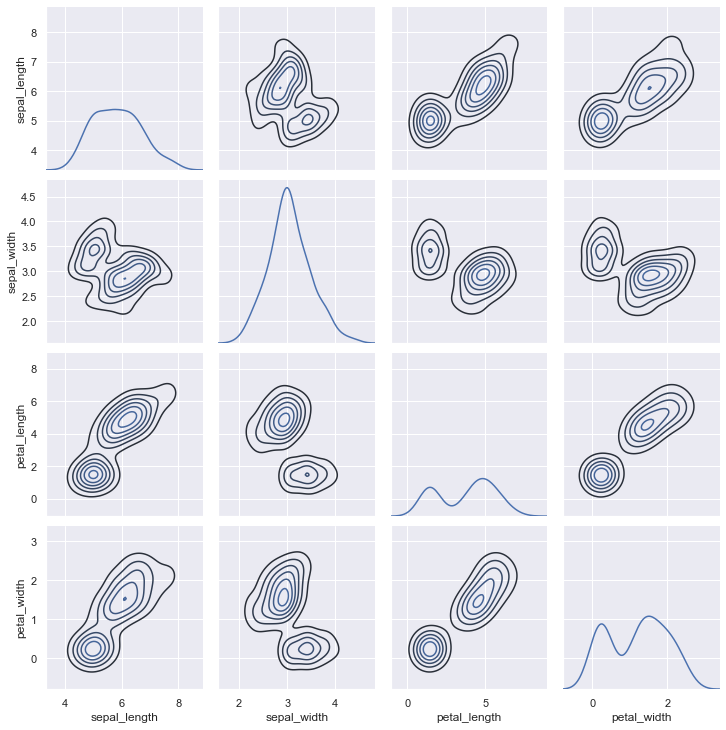

In [117]:
g = sn.PairGrid(iris_data) # creating PairGrid Object
g.map_diag(sn.kdeplot) # mapping the kdeplot digonal wise
g.map_offdiag(sn.kdeplot, n_levels=6)  # mapping non diagonal position kde plots

# Working With Categorial Plotting

### Count Plotting

    '''
        its also a Point Plot Type or Unvariate Type Plotting . Only  one parameter can be used as data to be plotting.    
    '''

In [138]:
v = sn.load_dataset('tips')
v.head(10)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2

### With Single Parameter

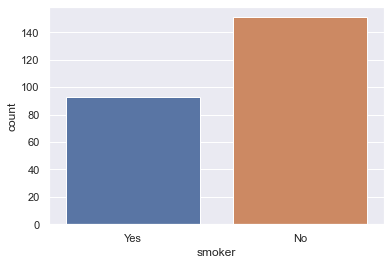

In [129]:
n = sn.countplot(x = 'smoker', data = tips)

### Passing Two Parameters 

In [136]:
try :
    n1 = sn.countplot(x = 'sex', y = 'total_bill' , data = tips)
except Exception as e :
    print(e)

Cannot pass values for both `x` and `y`


### With Hue Count Plot 

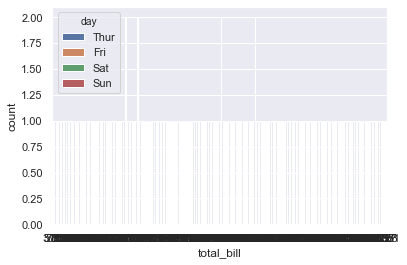

In [143]:
c = sn.countplot(x = 'total_bill', hue = 'day', data = tips)

# Point Plotting

    '''
   
    A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.

    Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables.
    They are particularly adept at showing interactions: how the relationship between levels of one categorical variable changes across levels of a second categorical variable.
    The lines that join each point from the same hue level allow interactions to be judged by differences in slope, which is easier for the eyes than comparing the heights of several groups of points or bars.
    
    
    '''

In [148]:
tips = sn.load_dataset(name = 'tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

### A Group of Vertical Point Plots Grouped By a Value

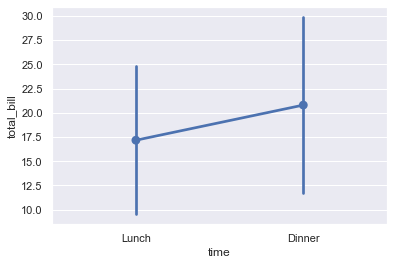

In [181]:
ax = sn.pointplot(x="time", y="total_bill",  data=tips, ci = 'sd')

In [163]:
t = tips['total_bill'].astype('float32')
s = tips['sex'].astype('str')

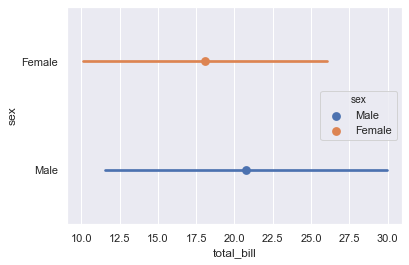

In [174]:
try :
    v = sn.pointplot(x = t,  y = s , data = tips, hue = 'sex', ci = 'sd')
except Exception as e :
    print(e)


### Draw a set of vertical points with nested grouping by a two variables

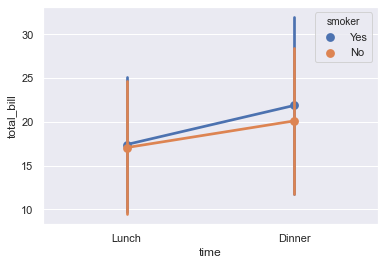

In [184]:
ax = sn.pointplot(x="time", y="total_bill", hue="smoker", ci = 'sd', data=tips)

### Use a different marker and line style for the hue levels

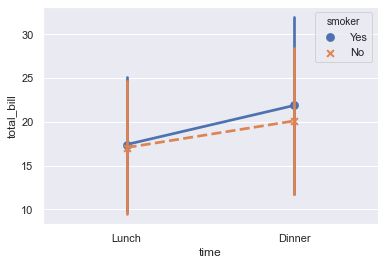

In [186]:
ax = sn.pointplot(x="time", y="total_bill", hue="smoker", data=tips, ci = 'sd', markers=["o", "x"], linestyles=["-", "--"])

### Draw a set of horizontal points

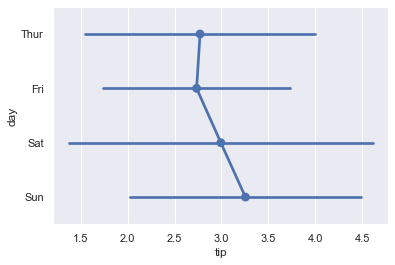

In [188]:
ax = sn.pointplot(x="tip", y="day", data=tips, ci = 'sd')

### Drawing  a line In Separate Points

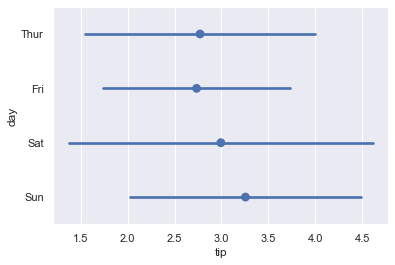

In [190]:
ax = sn.pointplot(x="tip", y="day", data=tips, ci = 'sd', join=False)

### Use median as the estimate of central tendency

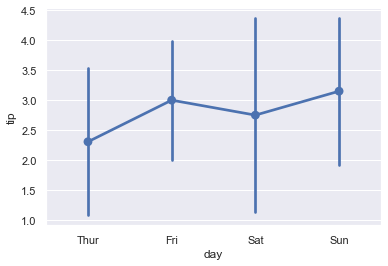

In [172]:
ax = sn.pointplot(x="day", y="tip", data=tips, estimator=median, ci ='sd' )

### Show standard deviation of observations instead of a confidence interval

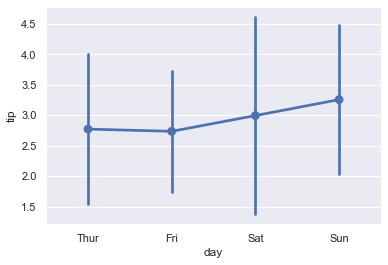

In [199]:
ax = sn.pointplot(x="day", y="tip", data=tips, ci= 'sd')

### Use catplot() to combine a pointplot() and a FacetGrid. This allows grouping within additional categorical variables.
### Using catplot() is safer than using FacetGrid directly, as it ensures synchronization of variable order across facets.

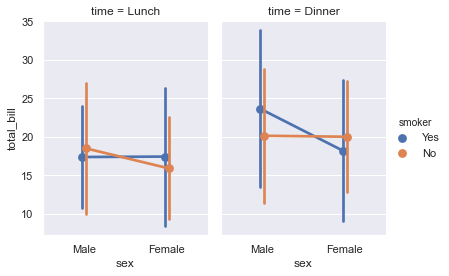

In [178]:
g = sn.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="point",
                ci = 'sd',
                dodge=True,
                height=4, aspect=.7
               )

# Factor Plot

    '''
        A Factor Plot is a great method to visualize different categorical values, but it is trciky to add the title
        and change the size or manipulate x and y.
        
        Factor plot is informative when we have multiple groups to compare..
        
        It is similar like the Point Plot
    
    '''

In [206]:
dots = sn.load_dataset(name = 'dots')
dots.head()

align choice  time  coherence  firing_rate
0  dots     T1   -80        0.0    33.189967
1  dots     T1   -80        3.2    31.691726
2  dots     T1   -80        6.4    34.279840
3  dots     T1   -80       12.8    32.631874
4  dots     T1   -80       25.6    35.060487

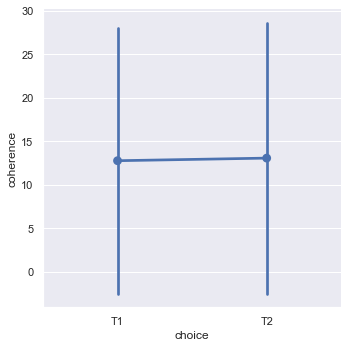

In [210]:
p = sn.factorplot(x = 'choice', y = 'coherence' , data = dots, ci = 'sd')

### With Hue Specified 

c:\users\jaber\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


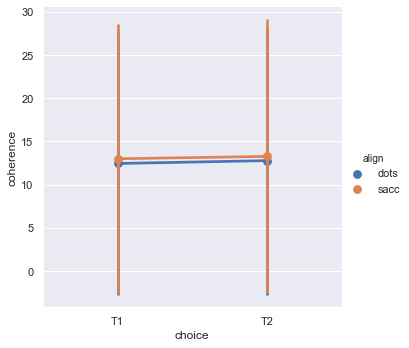

In [212]:
p = sn.factorplot(x = 'choice', y = 'coherence' , data = dots, hue = 'align',  ci = 'sd')

### With Kind Specified

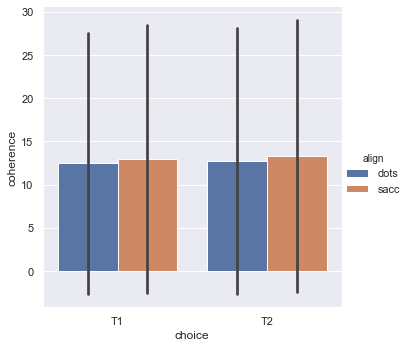

In [218]:
p = sn.factorplot(x = 'choice', y = 'coherence' , data = dots, hue = 'align', kind = 'bar',  ci = 'sd')

c:\users\jaber\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


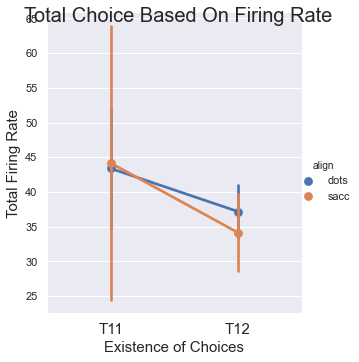

In [225]:
f = sn.factorplot(data= dots, x= 'choice', y= 'firing_rate', hue= 'align',  ci = 'sd')

f.fig.suptitle('Total Choice Based On Firing Rate', fontsize= 20)
f.fig.set_size_inches(5, 5)
f.set_xlabels('Existence of Choices', fontsize= 15)
f.set_xticklabels(['T11', "T12"], fontsize= 15)
f.set_ylabels('Total Firing Rate', fontsize= 15)
f.set_xticklabels(fontsize= 15)

# Swarm Plot

    '''
        This function is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. 
        This gives a better representation of the distribution of values, but it does not scale well to large numbers of observations.
        This style of plot is sometimes called a “beeswarm”.
    
    '''

### Over A Single Column

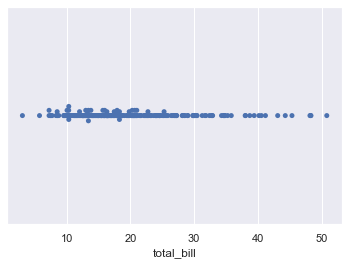

In [233]:
tips = sn.load_dataset("tips")
ax = sn.swarmplot(x=tips["total_bill"])

### Group the Swarms by a Categorical Variable

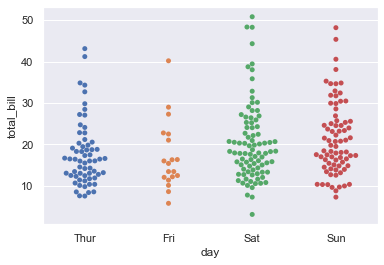

In [234]:
ax = sn.swarmplot(x="day", y="total_bill", data=tips)

### With Palette Specified

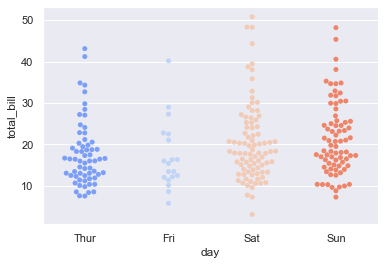

In [263]:
ax = sn.swarmplot(x="day", y="total_bill", data=tips, palette = 'coolwarm') # palette = 'cool'/'coolwarm'/'magma'

### Horizontal Swarm

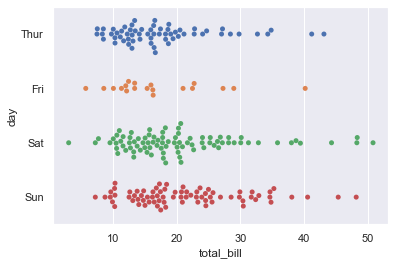

In [241]:
ax = sn.swarmplot(x="total_bill", y="day", data=tips)

### With Hue  And Order Specified

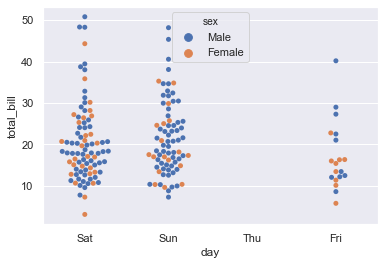

In [245]:
ax = sn.swarmplot(x="day", y="total_bill",hue = 'sex', data=tips, order = ['Sat', 'Sun', "Thu", 'Fri'])

### Draw swarms of observations on top of a box plot

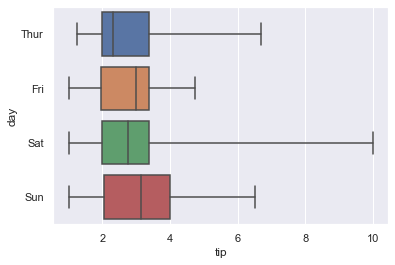

In [246]:
ax = sn.boxplot(x="tip", y="day", data=tips, whis=np.inf)

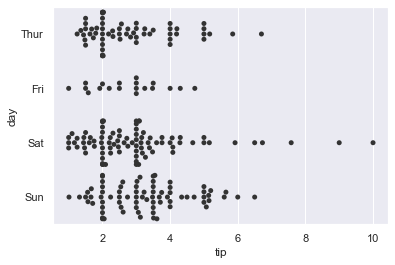

In [247]:
ax = sn.swarmplot(x="tip", y="day", data=tips, color=".2")

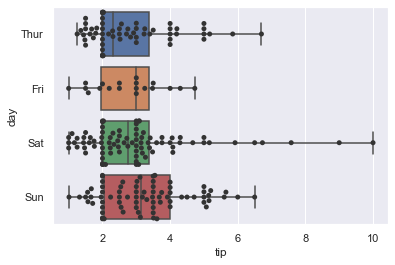

In [248]:
ax = sn.boxplot(x="tip", y="day", data=tips, whis=np.inf)
ax = sn.swarmplot(x="tip", y="day", data=tips, color=".2")

### Use catplot() to combine a swarmplot() and a FacetGrid. This allows grouping within additional categorical variables. 
### Using catplot() is safer than using FacetGrid directly, as it ensures synchronization of variable order across facets.

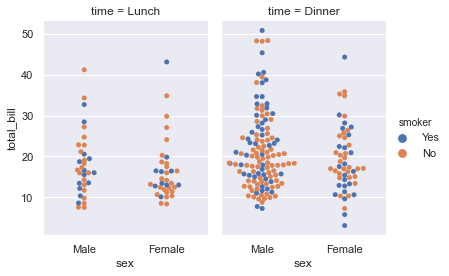

In [251]:
g = sn.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="swarm",
                height=4, aspect=.7
               )

# Strip Plot

    '''
        A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where 
        you want to show all observations along with some representation of the underlying distribution.
    
    
    '''

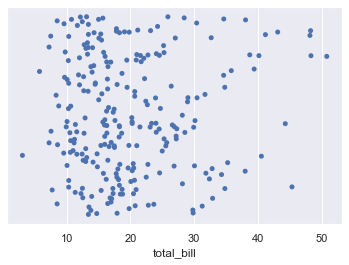

In [253]:
tips = sn.load_dataset("tips")
ax = sn.stripplot(x=tips["total_bill"])

### Group the strips by a categorical variable

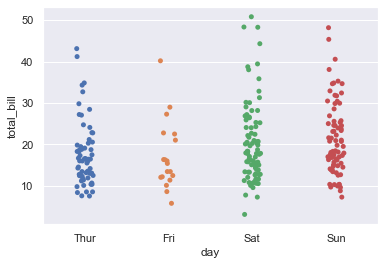

In [254]:
ax = sn.stripplot(x="day", y="total_bill", data=tips)


### Use a smaller amount of jitter

    '''
    jitter can be used to randomly provide displacements along the horizontal axis, which is useful when there are large 
    clusters of datapoints.
    
    '''

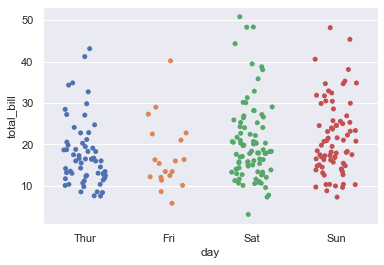

In [264]:
ax = sn.stripplot(x="day", y="total_bill", data=tips, jitter=0.25) 

### With Dodge Specified

    '''
    jitter can be used to randomly provide displacements along the horizontal axis,  
    which is useful when there are large clusters of datapoints.

    '''

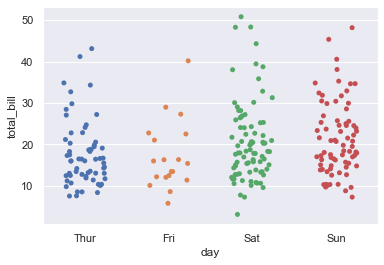

In [266]:
ax = sn.stripplot(x="day", y="total_bill", data=tips, jitter=0.25, dodge=True)

### With Hue & Order Specified

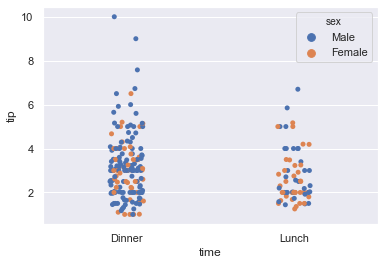

In [259]:
ax = sn.stripplot(x="time", y="tip", data=tips, hue = 'sex' , order=["Dinner", "Lunch"])

### Draw strips with large points and different aesthetics

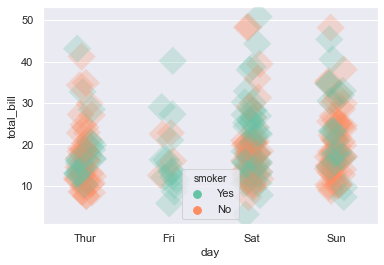

In [260]:
ax =  sn.stripplot("day", "total_bill", "smoker", data=tips,
                   palette="Set2", size=20, marker="D",
                   edgecolor="gray", alpha=.25
                   )

### Use catplot() to combine a stripplot() and a FacetGrid. This allows grouping within additional categorical variables. 
### Using catplot() is safer than using FacetGrid directly, as it ensures synchronization of variable order across facets

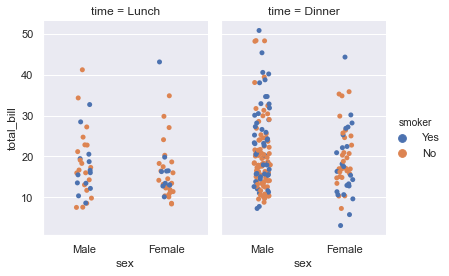

In [261]:
g = sn.catplot(x="sex", y="total_bill", hue="smoker", col="time", data=tips, kind="strip", height=4, aspect=.7 )

# Violin PLot

    '''
        Draw a combination of boxplot and kernel density estimate.
        
        
        A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across 
        several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box 
        plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel 
        density estimation of the underlying distribution.

        This can be an effective and attractive way to show multiple distributions of data at once, but keep in mind that 
        the estimation procedure is influenced by the sample size, and violins for relatively small samples might look 
        misleadingly smooth.
    
    '''

### Draw a single horizontal violinplot

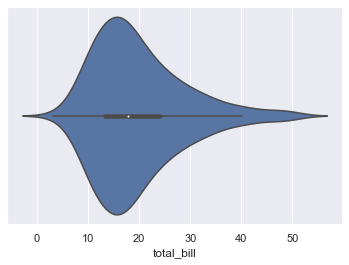

In [267]:
tips = sn.load_dataset("tips")
ax = sn.violinplot(x=tips["total_bill"])

### Draw a vertical violinplot grouped by a categorical variable.

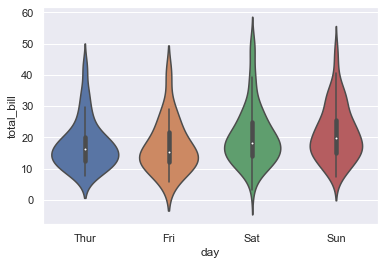

In [268]:
ax = sn.violinplot(x="day", y="total_bill", data=tips)

### Draw a violinplot with nested grouping by two categorical variables

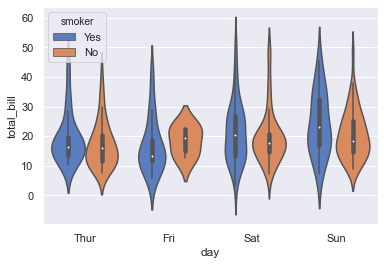

In [269]:
ax = sn.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted")

### Draw split violins to compare the across the hue variable

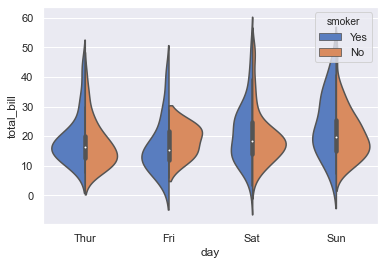

In [270]:
ax = sn.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted", split=True)

### Scale the violin width by the number of observations in each bin

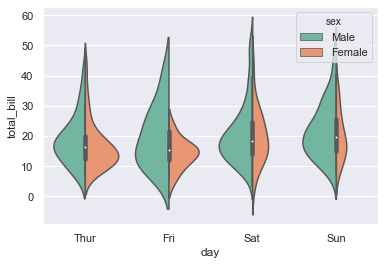

In [271]:
ax = sn.violinplot(x="day", y="total_bill", hue="sex", data=tips, palette="Set2", split=True, scale="count")
## split denotes the two data will merging together

### Draw the quartiles as horizontal lines instead of a mini-box

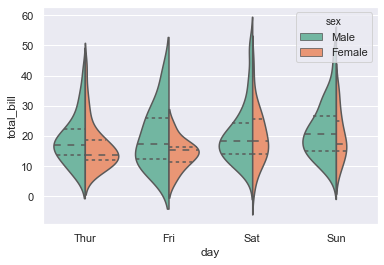

In [272]:
ax = sn.violinplot(x="day", y="total_bill", hue="sex", data=tips, palette="Set2", split=True, scale="count", inner="quartile")

### Use catplot() to combine a violinplot() and a FacetGrid. This allows grouping within additional categorical variables.
### Using catplot() is safer than using FacetGrid directly, as it ensures synchronization of variable order across facets.

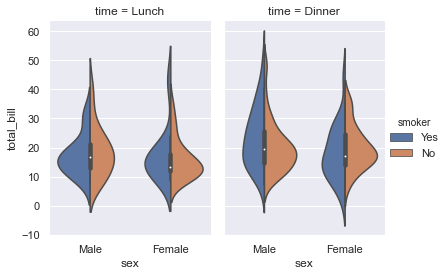

In [273]:
g = sn.catplot(x="sex", y="total_bill",  hue="smoker", col="time", data=tips, kind="violin", split=True,
                height=4, aspect=.7
              )

# Cat Plot

    '''
        Figure-level interface for drawing categorical plots onto a FacetGrid.
        

        This function provides access to several axes-level functions that show the relationship between a numerical and
        one or more categorical variables using one of several visual representations. 
        
        The kind parameter selects the underlying axes-level function to us.
    
    
    '''

### Draw a single facet to use the FacetGrid legend placement

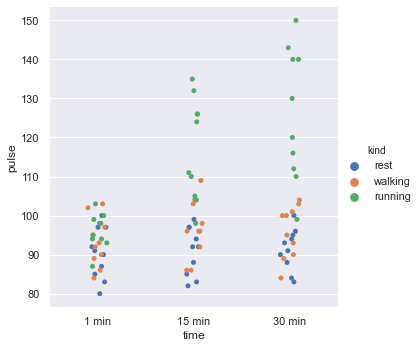

In [275]:
exercise = sn.load_dataset("exercise")
g = sn.catplot(x="time", y="pulse", hue="kind", data=exercise)

### Use a different plot kind to visualize the same data

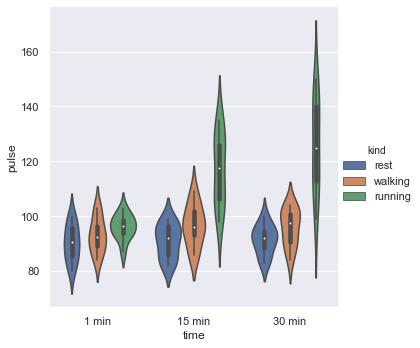

In [276]:
g = sn.catplot(x="time", y="pulse", hue="kind", data=exercise, kind="violin")

### With Kind Specified Swarm Plot

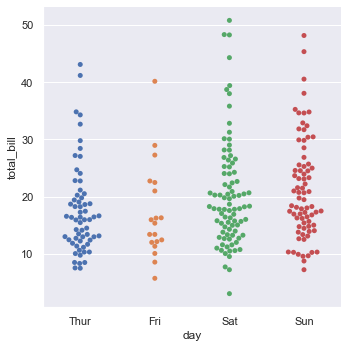

In [283]:
sn.catplot(x="day", y="total_bill", kind="swarm", data=tips)

### Specifying Kind to Box Plot

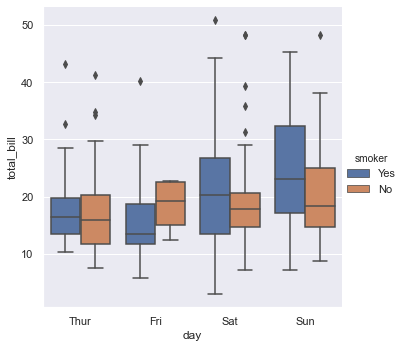

In [285]:
sn.catplot(x="day", y="total_bill", hue = 'smoker' ,kind="box", data=tips);

### Specifying The Kind to Boxen Plot

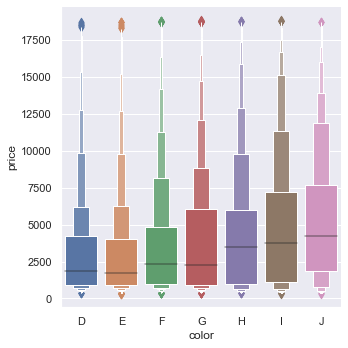

In [286]:
diamonds = sn.load_dataset("diamonds")
sn.catplot(x="color", y="price", kind="boxen", data=diamonds.sort_values("color") )

### Specifying The Kind to Bar Plot

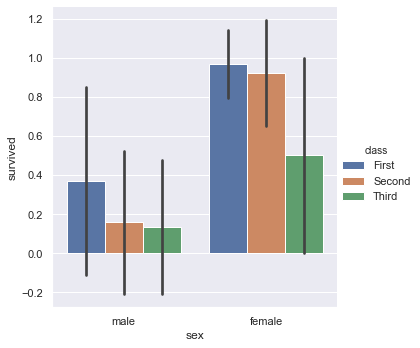

In [288]:
titanic = sn.load_dataset("titanic")
sn.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic, ci = 'sd')
# black line denoting the probability of error
# larger the black line ,, the larger the uncertainity increases

### Specifying The Kind To Count Plot

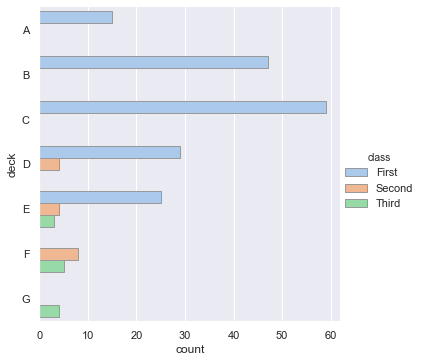

In [289]:
sn.catplot(y="deck", hue="class", kind="count",  palette="pastel", edgecolor=".6", data=titanic)

### Specifying the Kind to Point Plot

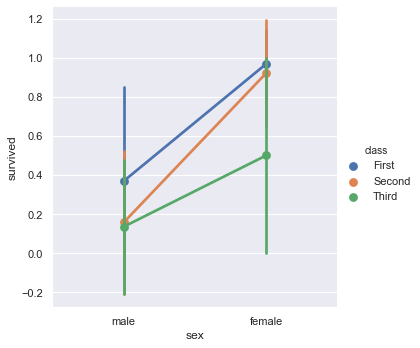

In [291]:
sn.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic, ci = 'sd')

### Facet along the columns to show a third categorical variable

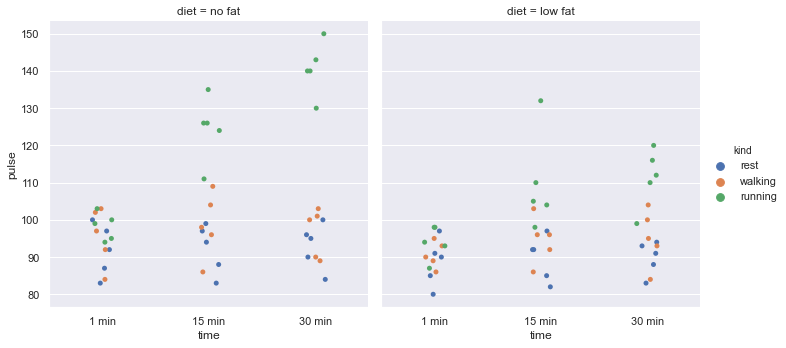

In [277]:
g = sn.catplot(x="time", y="pulse", hue="kind",  col="diet", data=exercise)

### Use a different height and aspect ratio for the facets

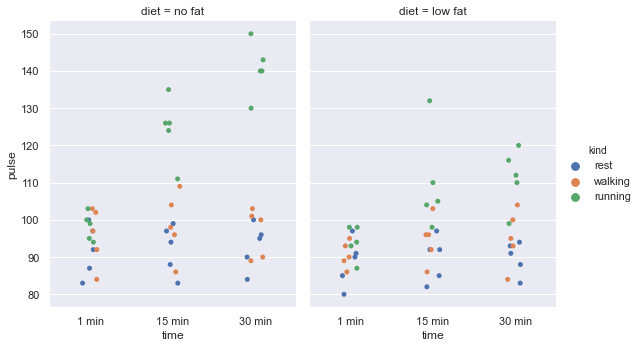

In [278]:
g = sn.catplot(x="time", y="pulse", hue="kind", col="diet", data=exercise, height=5, aspect=.8)

### Make many column facets and wrap them into the rows of the grid

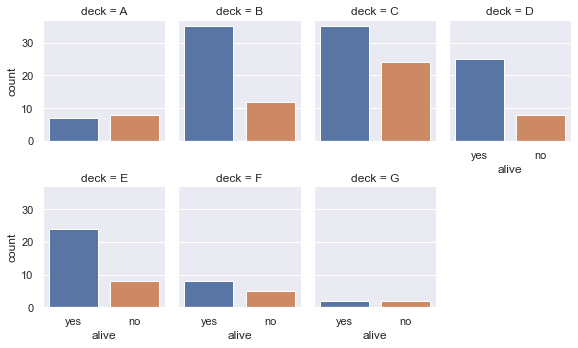

In [279]:
titanic = sn.load_dataset("titanic")
g = sn.catplot("alive", col="deck", col_wrap=4, data=titanic[titanic.deck.notnull()], kind="count", height=2.5, aspect=.8)

### Plot horizontally and pass other keyword arguments to the plot function

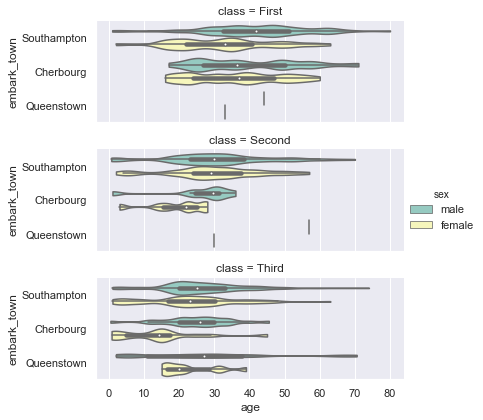

In [280]:
g = sn.catplot(x="age", y="embark_town",
                hue="sex", row="class",
                data=titanic[titanic.embark_town.notnull()],
                orient="h", height=2, aspect=3, palette="Set3",
                kind="violin", dodge=True, cut=0, bw=.2
              )

### Use methods on the returned FacetGrid to tweak the presentation

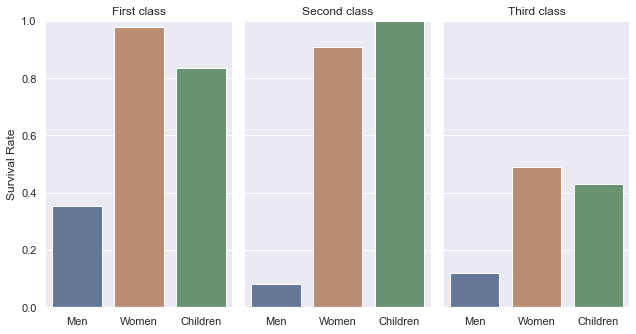

In [282]:
g = sn.catplot(x="who", y="survived", col="class",
                data=titanic, saturation=.5,
                kind="bar", ci=None, aspect=.6
              )
g.set_axis_labels("", "Survival Rate")
g.set_xticklabels(["Men", "Women", "Children"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)

# Working With Relational Plotting

# Scatter Plot

    '''
     Scatter plots are identical to Line graphs that show how much one variable is affected by presence of another and 
     this relationship between two variables is statistically termed as their correlation.
    
    '''

### Draw a simple scatter plot between two variables

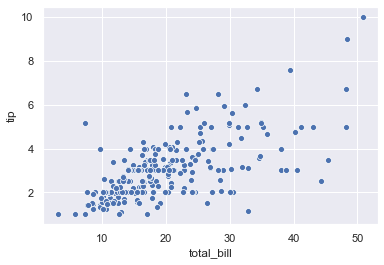

In [293]:
tips = sn.load_dataset("tips")
ax = sn.scatterplot(x="total_bill", y="tip", data=tips)

### Group by another variable and show the groups with different colors

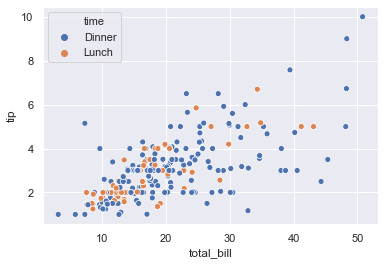

In [294]:
ax = sn.scatterplot(x="total_bill", y="tip", hue="time", data=tips)

### Show the grouping variable by varying both color and marker

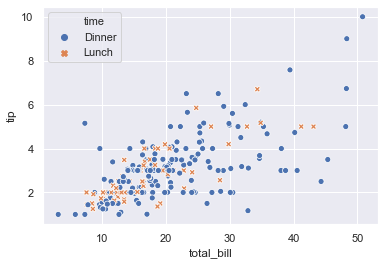

In [295]:
ax = sn.scatterplot(x="total_bill", y="tip", hue="time", style="time", data=tips)

### Vary colors and markers to show two different grouping variables

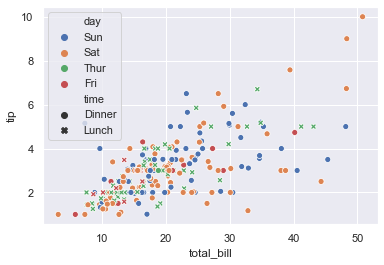

In [296]:
ax = sn.scatterplot(x="total_bill", y="tip", hue="day", style="time", data=tips)

### Show a quantitative variable by varying the size of the points

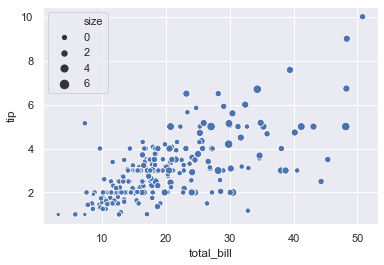

In [297]:
ax = sn.scatterplot(x="total_bill", y="tip", size="size" , data=tips)

### Use a different continuous color map

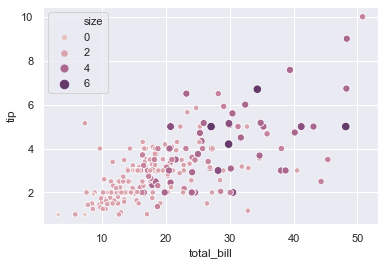

In [298]:
cmap = sn.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sn.scatterplot(x="total_bill", y="tip", hue="size", size="size", palette=cmap, data=tips)

### Change the minimum and maximum point size and show all sizes in legend

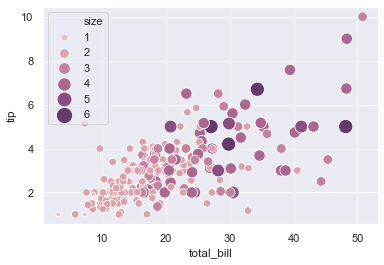

In [299]:
cmap = sn.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sn.scatterplot(x="total_bill", y="tip", hue="size", size="size", sizes=(20, 200), palette=cmap, legend="full", data=tips)

### Vary the size with a categorical variable, and use a different palette

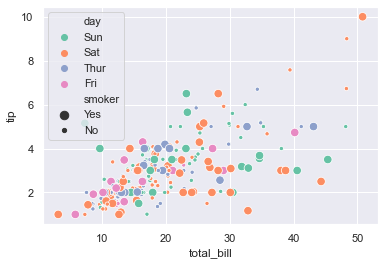

In [300]:
cmap = sn.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sn.scatterplot(x="total_bill", y="tip", hue="day", size="smoker", palette="Set2", data=tips)

### Use a specific set of markers

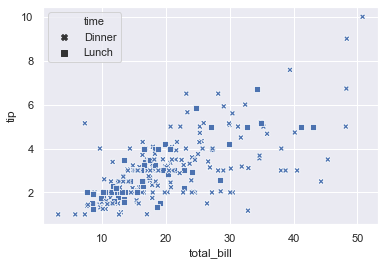

In [301]:
markers = {"Lunch": "s", "Dinner": "X"}
ax = sn.scatterplot(x="total_bill", y="tip", style="time", markers=markers, data=tips)

### Pass data vectors instead of names in a data frame

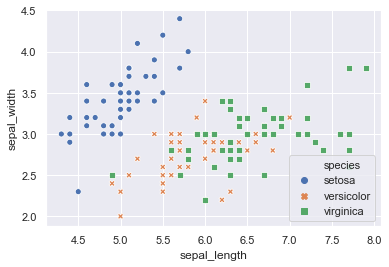

In [302]:
iris = sn.load_dataset("iris")
ax = sn.scatterplot(x=iris.sepal_length, y=iris.sepal_width, hue=iris.species, style=iris.species)

### Use relplot() to combine scatterplot() and FacetGrid: This allows grouping within additional categorical variables. 
### Using relplot() is safer than using FacetGrid directly, as it ensures synchronization of the semantic mappings across facets.

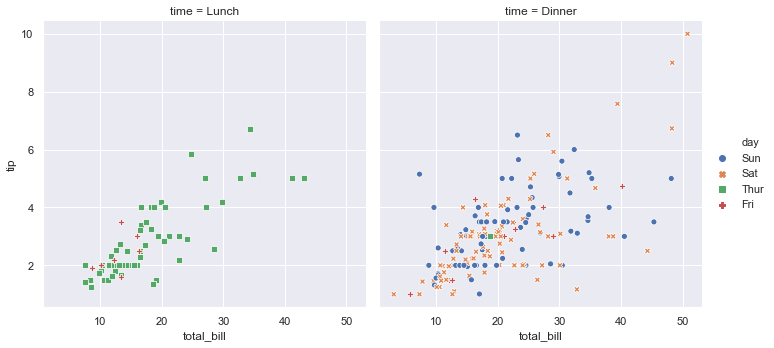

In [303]:
g = sn.relplot(x="total_bill", y="tip", col="time", hue="day", style="day", kind="scatter", data=tips)

### Pass a wide-form dataset and plot against its index

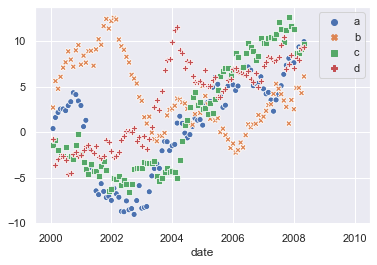

In [304]:
import numpy as np, pandas as pd; plt.close("all")
index = pd.date_range("1 1 2000", periods=100, freq="m", name="date")
data = np.random.randn(100, 4).cumsum(axis=0)
wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d"])
ax = sn.scatterplot(data=wide_df)

# Line Plot

### Draw a single line plot with error bands showing a confidence interval

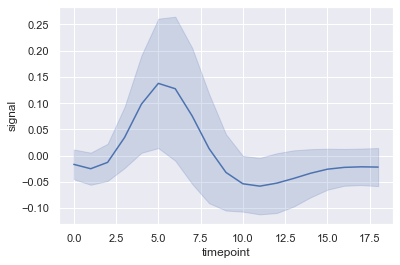

In [306]:
fmri = sn.load_dataset("fmri")
ax = sn.lineplot(x="timepoint", y="signal", data=fmri, ci = 'sd')

### To Swtiched Off The Confidence Interval

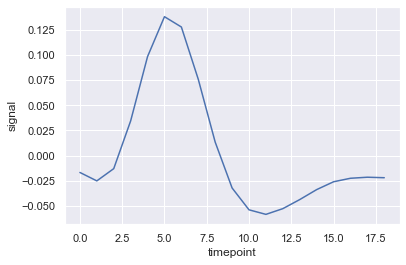

In [120]:
ax = sn.lineplot(x="timepoint", y="signal", data=fmri, ci = None ) # provide ci = None

### Group by another variable and show the groups with different colors

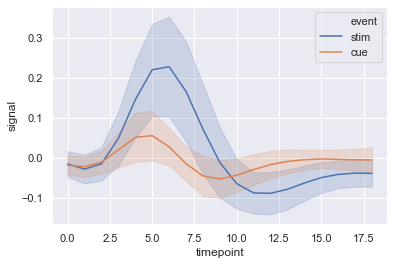

In [308]:
ax = sn.lineplot(x="timepoint", y="signal", hue="event", data=fmri, ci = 'sd')

### Show the grouping variable with both color and line dashing

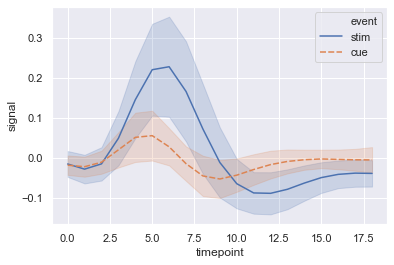

In [309]:
ax = sn.lineplot(x="timepoint", y="signal", hue="event", style="event", data=fmri, ci = 'sd')

### Use color and line dashing to represent two different grouping variables

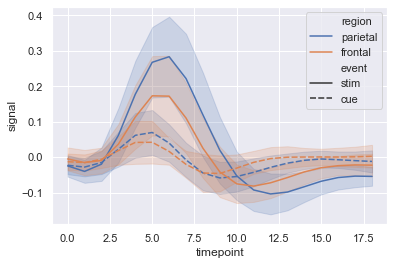

In [310]:
ax = sn.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri, ci = 'sd')

### Provide Error Style To Show the Estimated Error Over The Confidence Interval

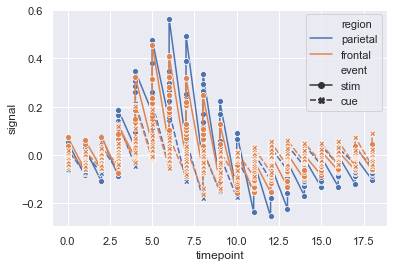

In [118]:
ax = sn.lineplot(x="timepoint", y="signal", hue="region" ,style = 'event',  data=fmri,
                 estimator = None, markers = True, ci =90,  err_style = 'bars')

### Use markers instead of the dashes to identify groups

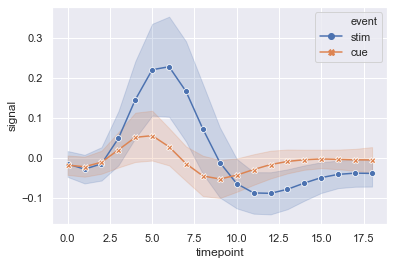

In [311]:
ax = sn.lineplot(x="timepoint", y="signal", hue="event", style="event", markers=True, dashes=False, data=fmri, ci = 'sd')

### Show error bars instead of error bands and plot the standard error

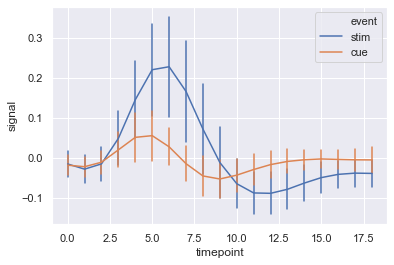

In [113]:
ax = sn.lineplot(x="timepoint", y="signal", hue="event", err_style="bars", ci='sd', data=fmri)


### Use a quantitative color mapping

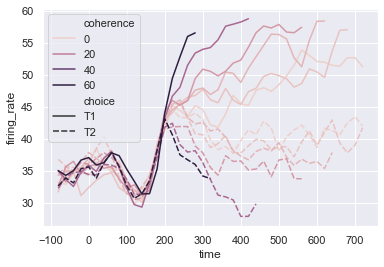

In [77]:
dots = sn.load_dataset("dots").query("align == 'dots'")
ax = sn.lineplot(x="time", y="firing_rate", hue="coherence", style="choice", data=dots)

### Use a different color palette

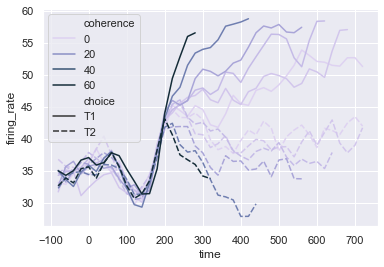

In [78]:
ax = sn.lineplot(x="time", y="firing_rate", hue="coherence", style="choice", palette="ch:2.5,.25", data=dots)

### Use specific color values, treating the hue variable as categorical

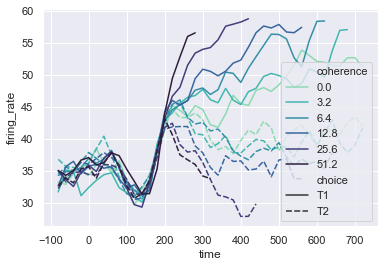

In [79]:
palette = sn.color_palette(palette = "mako_r", n_colors = 6)
ax = sn.lineplot(x="time", y="firing_rate", hue="coherence", style="choice", palette=palette, data=dots, legend = 'full')

### With Cubehelix Paletter Specified

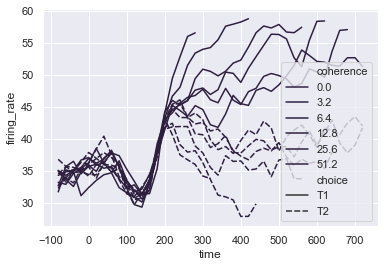

In [82]:
palette = sn.cubehelix_palette(light = 0.16 , n_colors = 6)
ax = sn.lineplot(x="time", y="firing_rate", hue="coherence", style="choice", palette=palette, data=dots, legend = 'full')

### Plot from a wide-form DataFrame

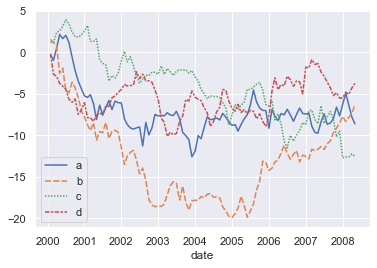

In [319]:
import numpy as np, pandas as pd; plt.close("all")
index = pd.date_range("1 1 2000", periods=100, freq="m", name="date")
data = np.random.randn(100, 4).cumsum(axis=0)
wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d"])
ax = sn.lineplot(data=wide_df)

### Plot from a list of Series

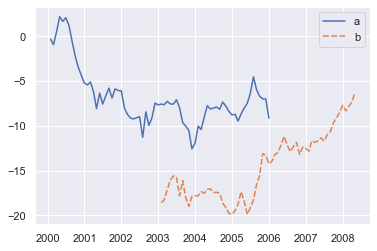

In [320]:
list_data = [wide_df.loc[:"2005", "a"], wide_df.loc["2003":, "b"]]
ax = sn.lineplot(data=list_data)

### Draw lines at points as they appear in the dataset

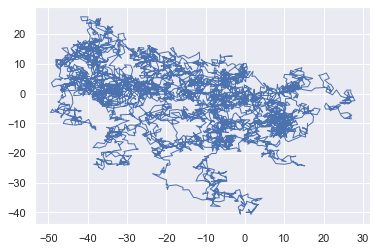

In [321]:
x, y = np.random.randn(2, 5000).cumsum(axis=1)
ax = sn.lineplot(x=x, y=y, sort=False, lw=1)

### Use relplot() to combine lineplot() and FacetGrid: This allows grouping within additional categorical variables.
### Using relplot() is safer than using FacetGrid directly, as it ensures synchronization of the semantic mappings across facets.

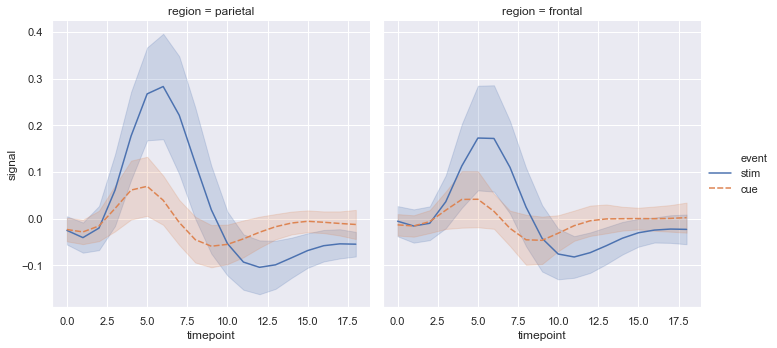

In [323]:
g = sn.relplot(x="timepoint", y="signal", col="region", hue="event", style="event", kind="line", data=fmri, ci ='sd')

# Relational Plot (Rel Plot)

### Draw a single facet to use the FacetGrid legend placement

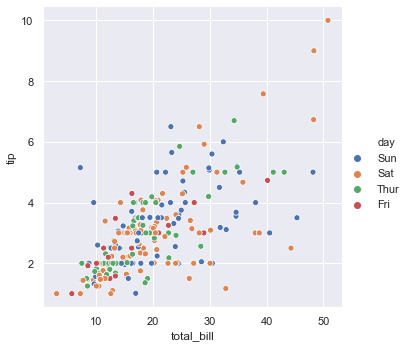

In [16]:
tips = sn.load_dataset("tips")
g = sn.relplot(x="total_bill", y="tip", hue="day", data=tips)

### With Multi Variate Specification 4 Variables On Categorical Variates

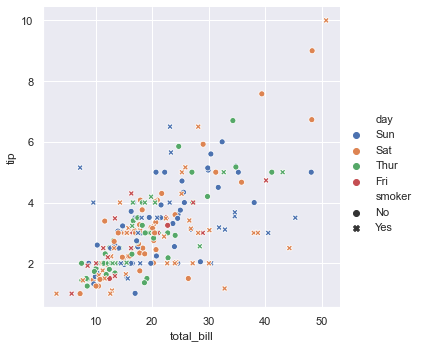

In [17]:
g = sn.relplot(x="total_bill", y="tip", hue="day", data=tips, style = 'smoker')

### With Multivaiates Specification On Numerical Variates

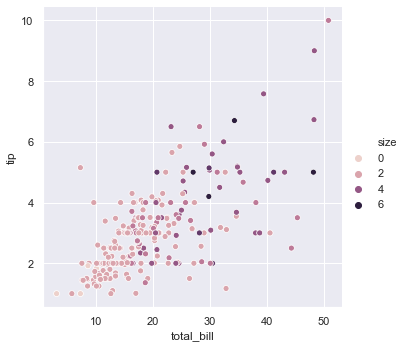

In [18]:
g = sn.relplot(x="total_bill", y="tip", hue="size", data=tips )

### With Palette Specification On Numerical Variates Or Changes Color Of The Circles

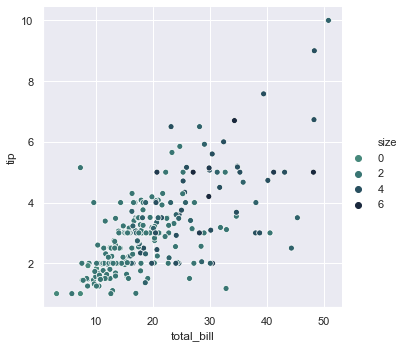

In [19]:
g = sn.relplot(x="total_bill", y="tip", hue="size", data=tips , palette = 'ch:r = -0.5, l = 0.45')

### Facet on the columns with another variable

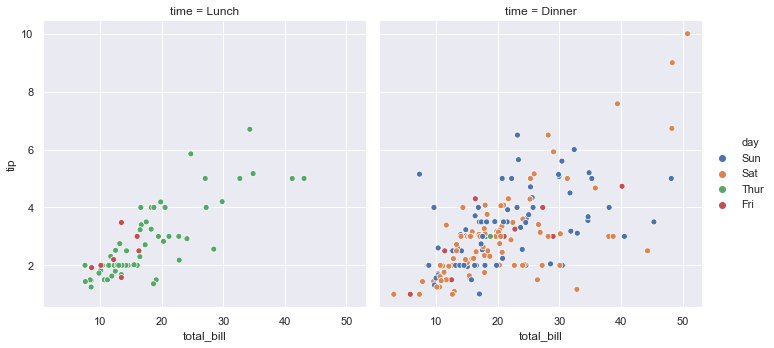

In [325]:
g = sn.relplot(x="total_bill", y="tip", hue="day", col="time", data=tips)

### Facet on the columns and rows

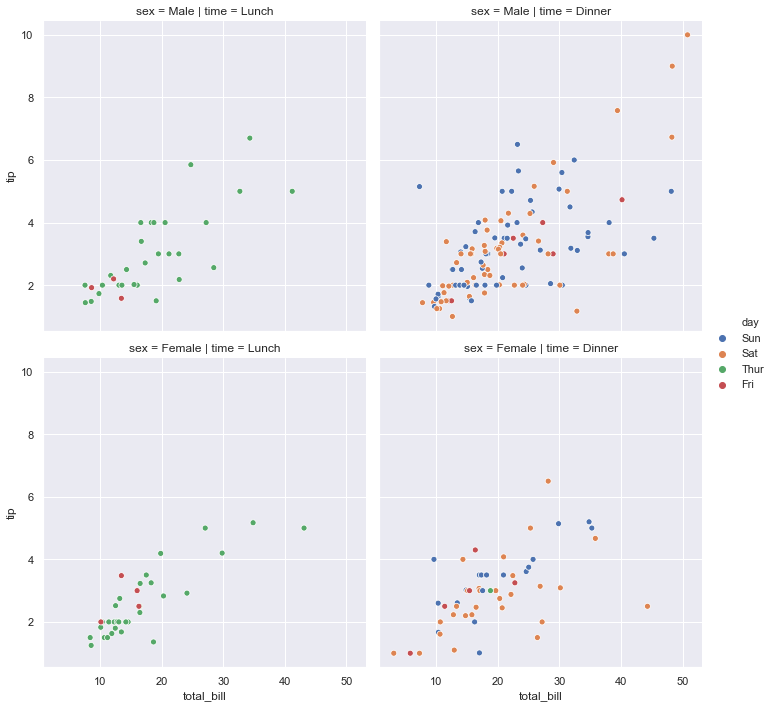

In [326]:
g = sn.relplot(x="total_bill", y="tip", hue="day", col="time", row="sex", data=tips)

### “Wrap” many column facets into multiple rows

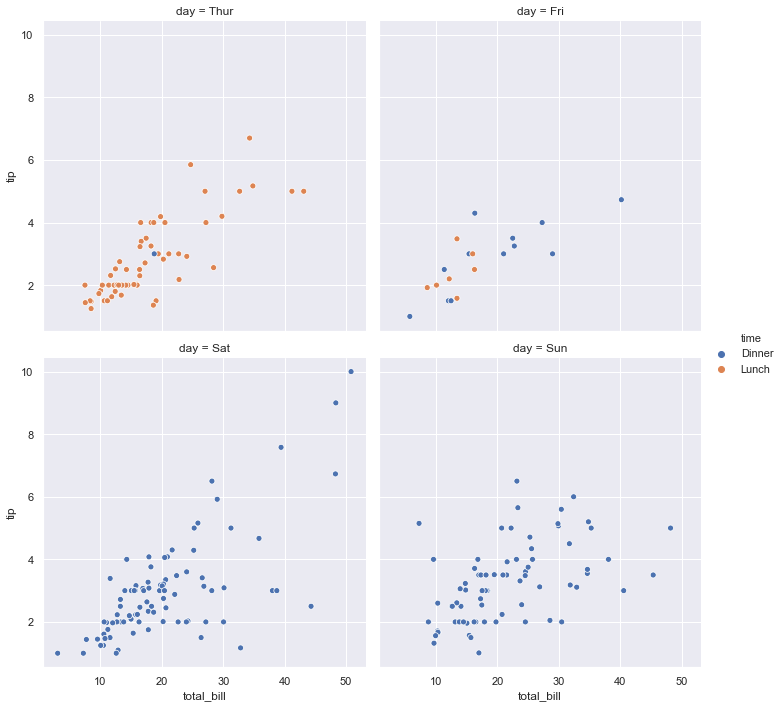

In [327]:
g = sn.relplot(x="total_bill", y="tip", hue="time", col="day", col_wrap=2, data=tips)

### Use multiple semantic variables on each facet with specified attributes

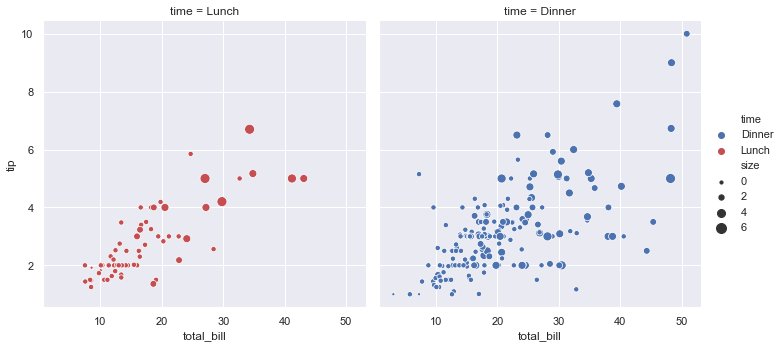

In [328]:
g = sn.relplot(x="total_bill", y="tip", hue="time", size="size", palette=["b", "r"], sizes=(10, 100), col="time", data=tips)

### Use a different kind of plot With Standard Deviation

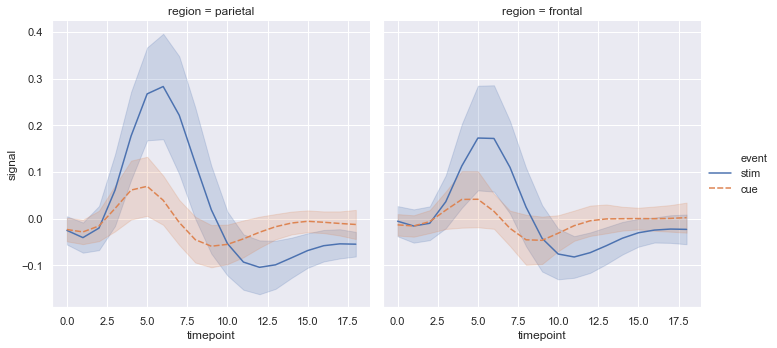

In [41]:
fmri = sn.load_dataset("fmri")
g = sn.relplot(x="timepoint", y="signal", hue="event", style="event", col="region", kind="line", data=fmri, ci = 'sd')
# ci = 'sd' means standard deviation over the data

### Change the size of each facet

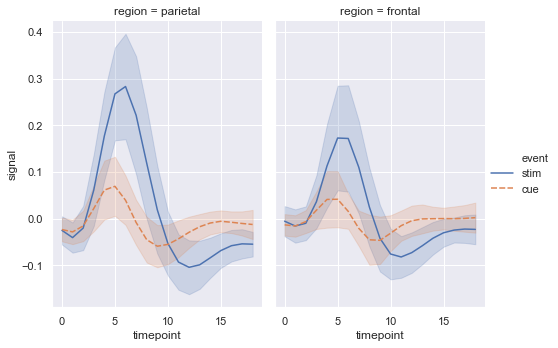

In [43]:
g = sn.relplot(x="timepoint", y="signal", hue="event", style="event", col="region", 
                height=5, aspect=.7, kind="line", data=fmri, ci = 'sd'
               )

### To See The Real Data Looks Like Switched Off The Estimator = None

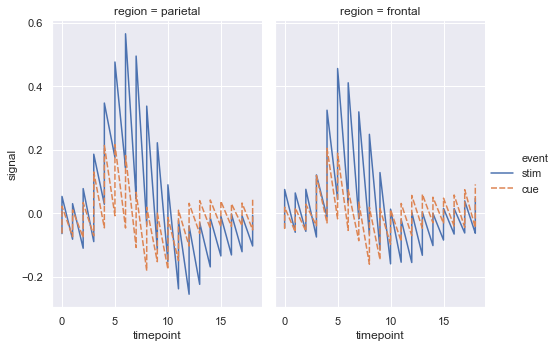

In [44]:
g = sn.relplot(x="timepoint", y="signal", hue="event", style="event", col="region", 
                height=5, aspect=.7, kind="line", data=fmri, estimator = None,
               )

### Working With Fmri Data Set

In [51]:
fmri = sn.load_dataset(name = 'fmri')
fmri.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

### Simply  Plot the Data

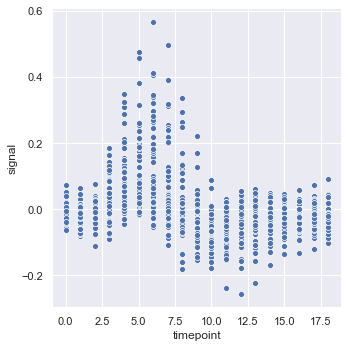

In [53]:
sn.relplot(x = 'timepoint', y = 'signal', data = fmri)

### Changes the kind to line plot

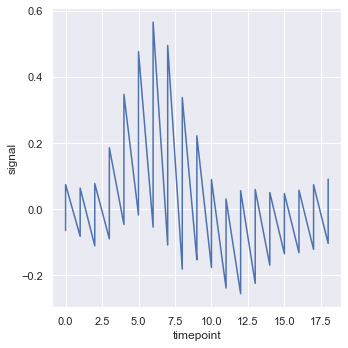

In [55]:
sn.relplot(x = 'timepoint', y = 'signal', kind = 'line', data = fmri, estimator = None)

### With Hue And Style Specified

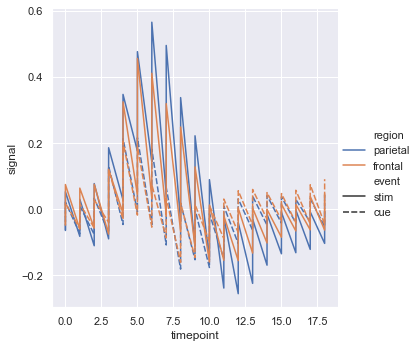

In [75]:
sn.relplot(x = 'timepoint', y = 'signal', hue = 'region', style ='event' ,kind = 'line', data = fmri, estimator = None)

### With Markers And Dasehs Specified

### Markers Specified

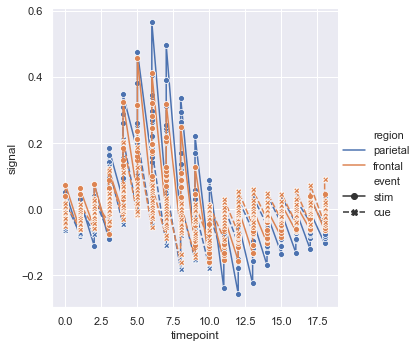

In [74]:
sn.relplot(x = 'timepoint', y = 'signal', hue = 'region', style ='event' ,kind = 'line', data = fmri, estimator = None, 
           markers = True)

### Dashes Specified

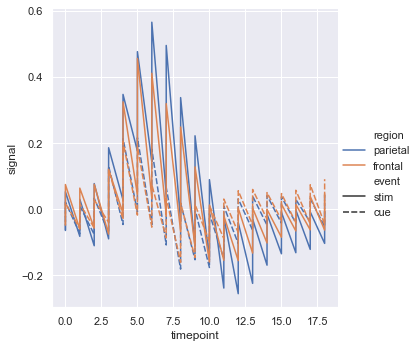

In [73]:
sn.relplot(x = 'timepoint', y = 'signal', hue = 'region', style ='event' ,kind = 'line', data = fmri, estimator = None, 
            dashes = True)

### Markers And Dashes Both Specified

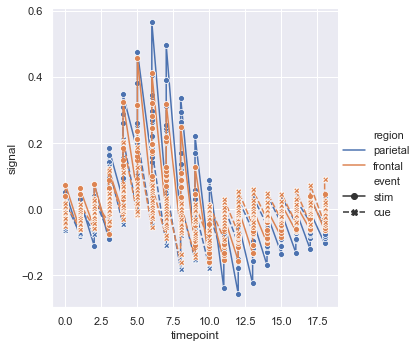

In [71]:
sn.relplot(x = 'timepoint', y = 'signal', hue = 'region', style ='event' ,kind = 'line', data = fmri, estimator = None,
           markers = True ,dashes = True )

### With Units Specified

### Over The Whole Data Means In Both Event

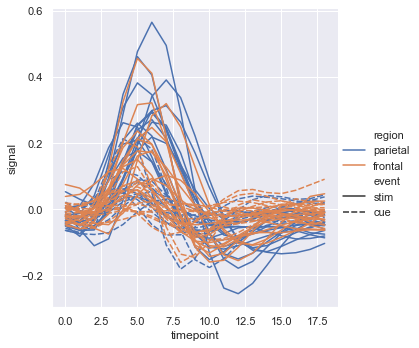

In [70]:
sn.relplot(x = 'timepoint', y = 'signal', hue = 'region', style ='event' ,kind = 'line', data = fmri, estimator = None, 
            units = 'subject')

### A Particular Event Lets say Stim Event Only

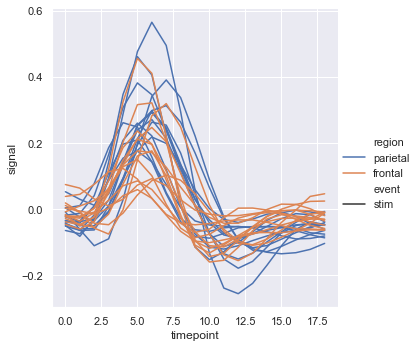

In [69]:
sn.relplot(x = 'timepoint', y = 'signal', hue = 'region', style ='event' ,kind = 'line',
           data = fmri.query(" event == 'stim' " ), estimator = None, units = 'subject'
          )

### Create A Real Time Date And Values For Them

In [87]:
df1 = pd.DataFrame(data = dict(time = pd.date_range('2019-06-02', periods = 500), values = randn(500).cumsum(axis = 0)), 
                   columns = ['time', 'values'])
df1

time    values
0   2019-06-02  0.545881
1   2019-06-03 -0.926910
2   2019-06-04 -1.212671
3   2019-06-05  0.275289
4   2019-06-06  0.366142
..         ...       ...
495 2020-10-09  7.956668
496 2020-10-10  8.000917
497 2020-10-11  9.023401
498 2020-10-12  8.553272
499 2020-10-13  9.181634

[500 rows x 2 columns]

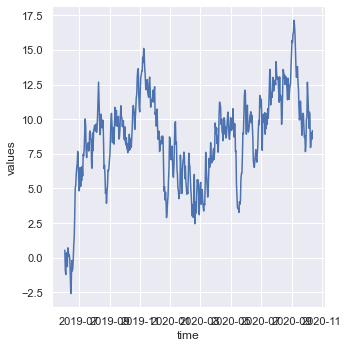

In [88]:
sn.relplot(x = 'time', y = 'values', kind = 'line', data = df1)

### Customize the X axis

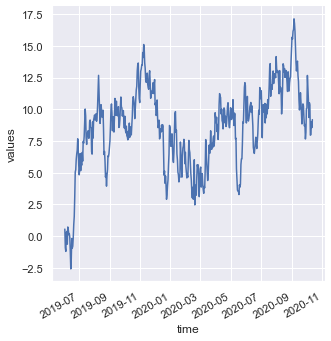

In [90]:
g = sn.relplot(x = 'time', y = 'values', kind = 'line', data = df1)
g.fig.autofmt_xdate()

### Create A DataFrame Then Plot The Relational Plot

In [20]:
from numpy.random import randn

In [28]:
dt = pd.DataFrame(dict(time = np.arange(500), values = randn(500).cumsum())) 
dt.head()

time    values
0     0 -1.707390
1     1 -2.188818
2     2 -2.120485
3     3 -3.930703
4     4 -4.338863

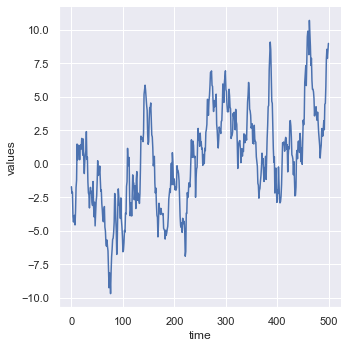

In [50]:
b = sn.relplot(x = 'time', y = 'values', kind ='line', data = dt )

### Check Over The Sorted Parameter Influence Over The Graph

In [35]:
dt1 = pd.DataFrame(data = randn(500, 2).cumsum(axis = 0), columns = ['time', 'values'])
dt1.head()

time    values
0 -1.097172 -1.645609
1 -0.500946 -0.150521
2  0.021160  0.662747
3  0.550933 -0.357068
4  0.851401 -0.635290

### When Data is Sorted

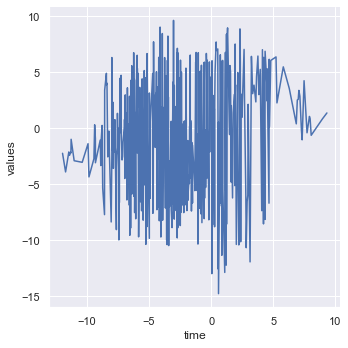

In [36]:
b1 = sn.relplot(x = 'time', y = 'values', kind = 'line', data=dt1, sort = True)

### When Data is Not Sorted

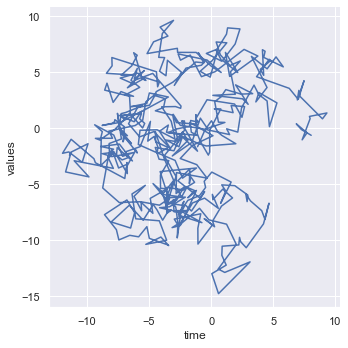

In [38]:
b1 = sn.relplot(x = 'time', y = 'values', kind = 'line', data=dt1, sort = False)

# Working With Linear Regression Plotting

### Regression Plot(Reg Plot)

### Plot the relationship between two variables in a DataFrame

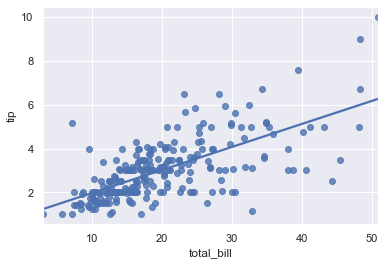

In [127]:
tips = sn.load_dataset("tips")
ax = sn.regplot(x="total_bill", y="tip", data=tips, ci = None)

### Plot with two variables defined as numpy arrays; use a different color

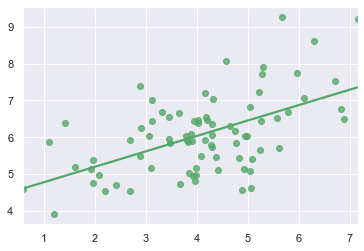

In [129]:
import numpy as np; np.random.seed(8)
mean = [4, 6]
covariance = [(1.5, .7), (.7, 1)]
x, y = np.random.multivariate_normal(mean, covariance, 80).T
ax = sn.regplot(x=x, y=y, color="g", ci = None)

### Plot with two variables defined as pandas Series; use a different marker

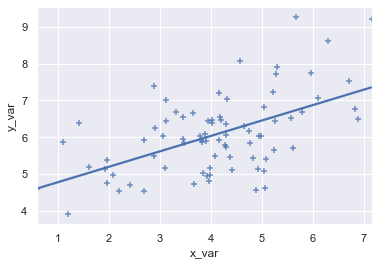

In [131]:
x = pd.Series(x, name="x_var")
y = pd.Series(y, name="y_var")
ax = sn.regplot(x=x, y=y, marker="+", ci =None)

### Use a 68% confidence interval, which corresponds with the standard error of the estimate, 
### And extend the regression line to the axis limits

Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'


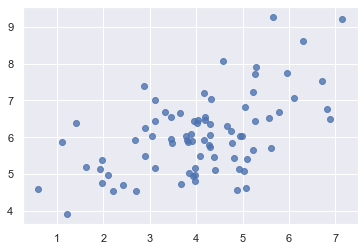

In [136]:
try :
    ax = sn.regplot(x=x, y=y, ci=68, truncate=False )
except Exception as e :
    print(e)


### Plot with a discrete x variable and add some jitter

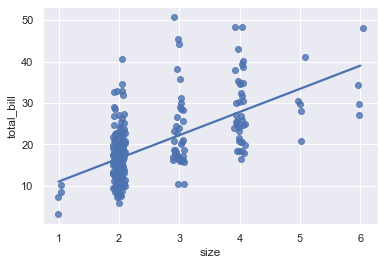

In [138]:
ax = sn.regplot(x="size", y="total_bill", data=tips, x_jitter=.1, ci = None)


### Plot with a discrete x variable showing means and confidence intervals for unique values

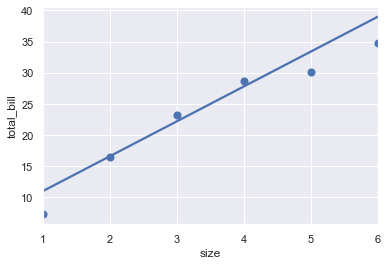

In [145]:
ax = sn.regplot(x="size", y="total_bill", data=tips, x_estimator=np.mean, ci =None )

### Plot with a continuous variable divided into discrete bins

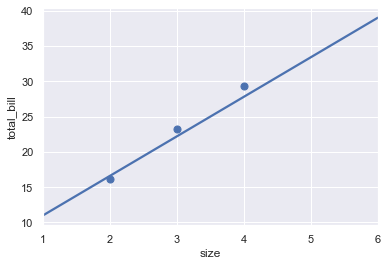

In [147]:
ax = sn.regplot(x="size", y="total_bill", data=tips, x_estimator=np.mean, ci =None , x_bins = 14)

### Fit a higher-order polynomial regression

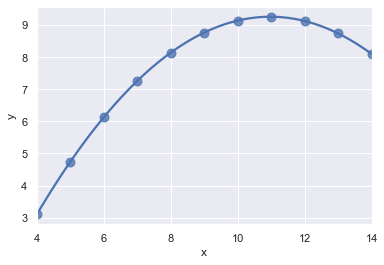

In [150]:
ans = sn.load_dataset("anscombe")
ax = sn.regplot(x="x", y="y", data=ans.loc[ans.dataset == "II"], scatter_kws={"s": 80}, order=2, ci=None)

### Fit The Third Polynomial Regression

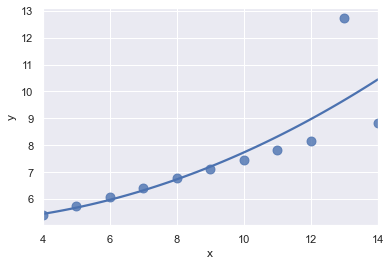

In [166]:
ax = sn.regplot(x="x", y="y", data=ans.loc[ans.dataset == "III"], scatter_kws={"s": 80}, order=2, ci=None)

### Fit a robust regression and don’t plot a confidence interval or remove the outlier data point

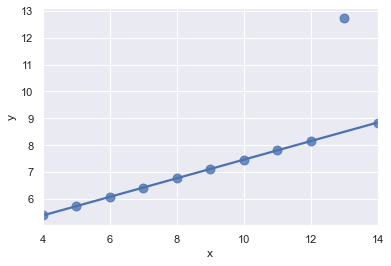

In [151]:
ax = sn.regplot(x="x", y="y", data=ans.loc[ans.dataset == "III"], scatter_kws={"s": 80}, robust=True, ci=None)

### Fit a logistic regression; jitter the y variable and use fewer bootstrap iterations

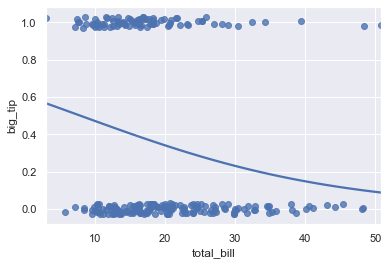

In [153]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .175
ax = sn.regplot(x="total_bill", y="big_tip", data=tips, logistic=True, n_boot=500, y_jitter=.03, ci = None)

### Fit the regression model using log(x)

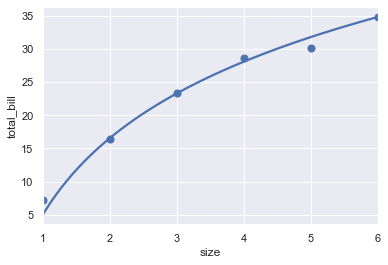

In [154]:
ax = sn.regplot(x="size", y="total_bill", data=tips, x_estimator=np.mean, logx=True, ci = None)

### Interfacing Subplots With Matplotlib Subplots Specifying The Axes Paramter

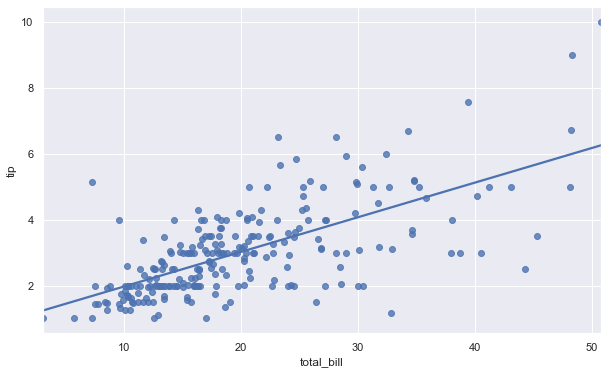

In [178]:
f, ax = plt.subplots(figsize =(10,6))
g = sn.regplot(x="total_bill", y="tip" , data=tips, ci = None, ax = ax)

# LM Plotting

### Plot a simple linear relationship between two variables

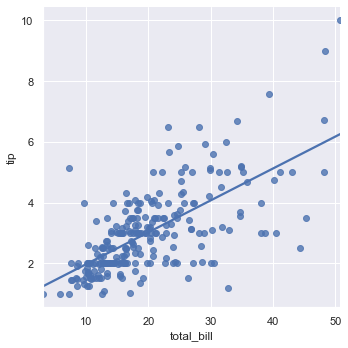

In [156]:
tips = sn.load_dataset("tips")
g = sn.lmplot(x="total_bill", y="tip", data=tips, ci = None)

### Condition on a third variable hue specified and plot the levels in different colors

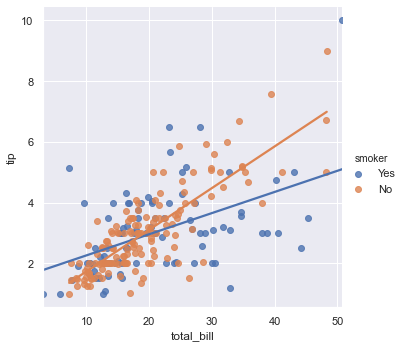

In [157]:
g = sn.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, ci = None)

### With Markers Specified

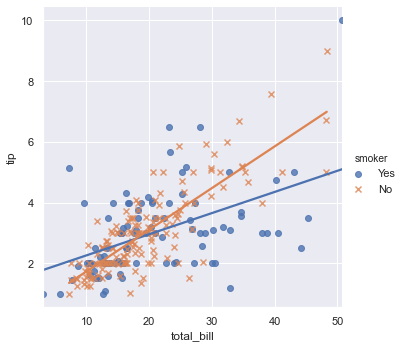

In [158]:
g = sn.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, markers=["o", "x"] , ci = None)

### With Color Paletter Specified

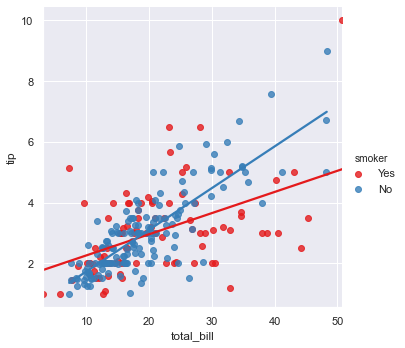

In [159]:
g = sn.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, palette="Set1", ci = None)

### Map hue levels to colors with a dictionary

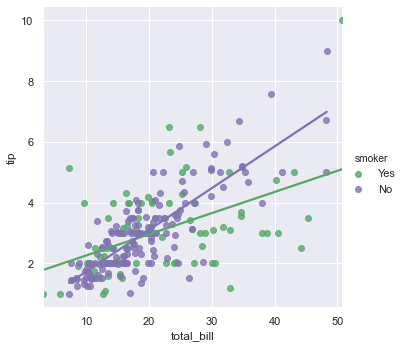

In [160]:
g = sn.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, palette=dict(Yes="g", No="m"), ci = None)

### Plot the levels of the third variable across different columns

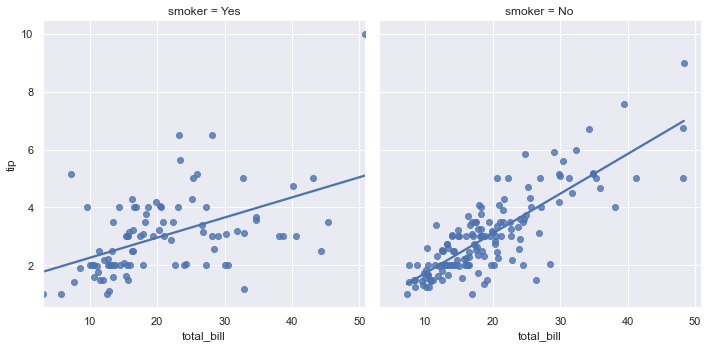

In [162]:
g = sn.lmplot(x="total_bill", y="tip", col="smoker", data=tips, ci = None)

### Change the height and aspect ratio of the facets

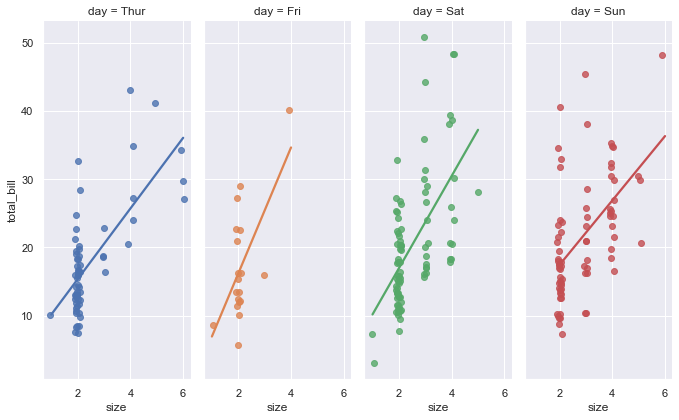

In [164]:
g = sn.lmplot(x="size", y="total_bill", hue="day", col="day", data=tips, height=6, aspect=.4, x_jitter=.1, ci = None)

### Wrap the levels of the column variable into multiple rows

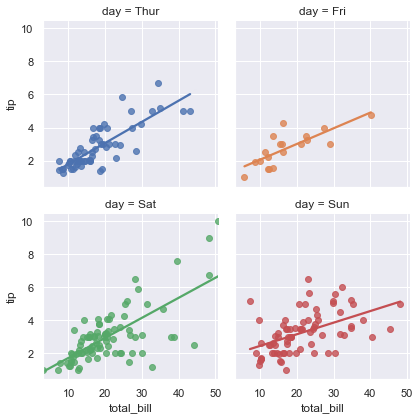

In [165]:
g = sn.lmplot(x="total_bill", y="tip", col="day", hue="day", data=tips, col_wrap=2, height=3, ci = None)

# Working With  Matrix Plotting 


    '''
        A matrix plot is a plot of matrix data. A matrix plot is a color-coded diagram that has rows data, columns data,
        and values. We can create a matrix plot in seaborn using the heatmap() function in seaborn. With the heatmap()
        function, we specify the matrix data that we want to plot.
        
        Inside of this heatmap() function, we also specify optional parameters, such as to place the value of the 
        data inside of each of the data points and to create a different color pattern for the matrix plot.
    
    
    '''

In [334]:
flight = sn.load_dataset(name = 'flights')
flight.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

### Before Converting The Data Directly Using heatmap() function 

In [339]:
try :
    sn.heatmap(flight) # without converting the data
except Exception as e :
    print(e)

ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


### Converting the Data Using corr()

In [341]:
flight2 = flight.corr() # converting the data
flight2


year  passengers
year        1.000000    0.921824
passengers  0.921824    1.000000

# Heat Map Plotting

### Now Apply the HeatMap Function to it 

matplotlib.axes._subplots.AxesSubplot

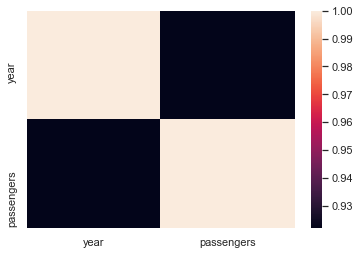

In [344]:
x = sn.heatmap(data = flight2) # just with the data parameter
type(x)

### With Annot Specified

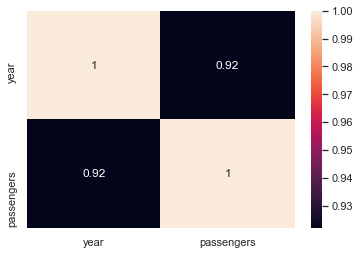

In [345]:
x1 = sn.heatmap(data = flight2, annot = True) #  If annot = True, then write the data value in each cell.

### With Colomap Specified

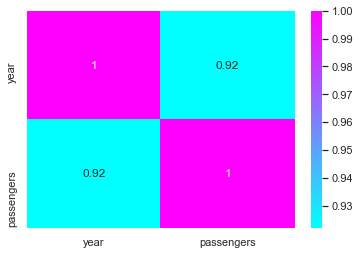

In [346]:
x2 = sn.heatmap(data = flight2, annot = True, cmap ='cool' )

### With Linewidth or lw Defined To Divide Each Cells

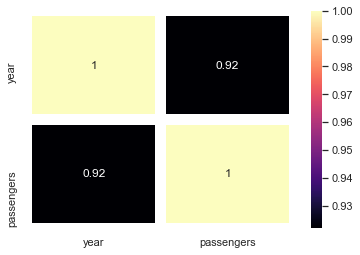

In [347]:
x3 = sn.heatmap(data = flight2, annot = True, cmap = 'magma', linewidth = 10)

### Specify The Line Color To Colored The Each Divided Cells

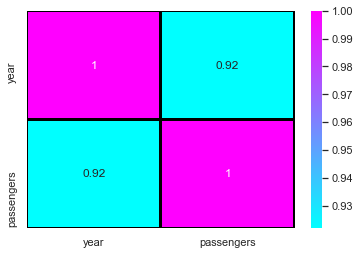

In [358]:
x4 = sn.heatmap(data = flight2, annot = True, lw = 2, cmap = 'cool' , linecolor ='black' )

### Converting Using The pivot_table()  Method

In [367]:
f2 = flight.pivot_table(index = 'month', columns = 'year', values = 'passengers')
f2

year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
February    118   126   150   180   196   188   233   277   301   318   342   
March       132   141   178   193   236   235   267   317   356   362   406   
April       129   135   163   181   235   227   269   313   348   348   396   
May         121   125   172   183   229   234   270   318   355   363   420   
June        135   149   178   218   243   264   315   374   422   435   472   
July        148   170   199   230   264   302   364   413   465   491   548   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   209   237   259   312   355   404   404   463   
October     119   133   162   191   211   229   274   306   347   359   407   
November    104   114   146   172   180   203   237   271   305   310   362   
December    118   140   166   194   201   229   278   306   336   337   405   

year       1960  
month            
January     417  
February    391  
March       419  
April       461  
May         472  
June        535  
July        622  
August      606  
September   508  
October     461  
November    390  
December    432

### With Margins Specified

In [388]:
f3 = flight.pivot_table(index = 'month', columns = 'year', values = 'passengers', margins = True)
f3

year             1949        1950        1951  1952  1953        1954  1955  \
month                                                                         
January    112.000000  115.000000  145.000000   171   196  204.000000   242   
February   118.000000  126.000000  150.000000   180   196  188.000000   233   
March      132.000000  141.000000  178.000000   193   236  235.000000   267   
April      129.000000  135.000000  163.000000   181   235  227.000000   269   
May        121.000000  125.000000  172.000000   183   229  234.000000   270   
June       135.000000  149.000000  178.000000   218   243  264.000000   315   
July       148.000000  170.000000  199.000000   230   264  302.000000   364   
August     148.000000  170.000000  199.000000   242   272  293.000000   347   
September  136.000000  158.000000  184.000000   209   237  259.000000   312   
October    119.000000  133.000000  162.000000   191   211  229.000000   274   
November   104.000000  114.000000  146.000000   172   180  203.000000   237   
December   118.000000  140.000000  166.000000   194   201  229.000000   278   
All        126.666667  139.666667  170.166667   197   225  238.916667   284   

year         1956        1957  1958        1959        1960         All  
month                                                                    
January    284.00  315.000000   340  360.000000  417.000000  241.750000  
February   277.00  301.000000   318  342.000000  391.000000  235.000000  
March      317.00  356.000000   362  406.000000  419.000000  270.166667  
April      313.00  348.000000   348  396.000000  461.000000  267.083333  
May        318.00  355.000000   363  420.000000  472.000000  271.833333  
June       374.00  422.000000   435  472.000000  535.000000  311.666667  
July       413.00  465.000000   491  548.000000  622.000000  351.333333  
August     405.00  467.000000   505  559.000000  606.000000  351.083333  
September  355.00  404.000000   404  463.000000  508.000000  302.416667  
October    306.00  347.000000   359  407.000000  461.000000  266.583333  
November   271.00  305.000000   310  362.000000  390.000000  232.833333  
December   306.00  336.000000   337  405.000000  432.000000  261.833333  
All        328.25  368.416667   381  428.333333  476.166667  280.298611

### Without Denoting The Annot Parameter

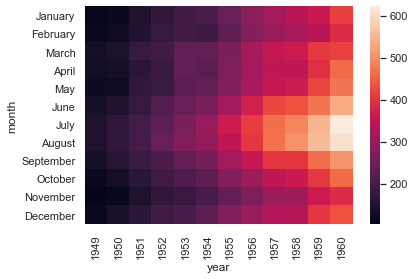

In [370]:
f1 = sn.heatmap(data = f2)

### Denoting The Annot & LineWidth(lw) Parameter

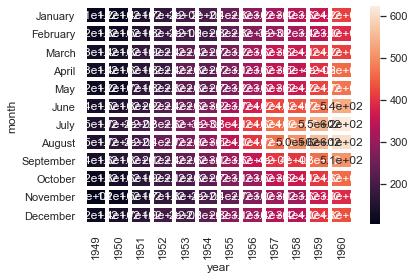

In [376]:
f1 = sn.heatmap(data = f2, annot = True, lw = 3)

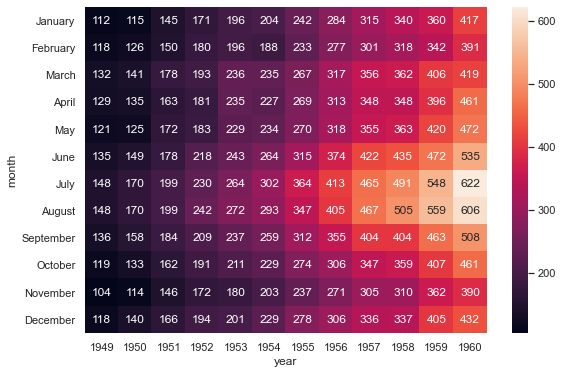

In [379]:
f, ax = plt.subplots(figsize=(9, 6))
f1 = sn.heatmap(data = f2, annot = True, fmt="d")

# Cluster Map Plotting 

### Using clustermap() function

In [381]:
flight = sn.load_dataset(name = 'flights')
flight.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

### With Pivot Specified

In [386]:
f2 = flight.pivot_table(index = 'month', columns = 'year',  values = 'passengers')
f2

year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
February    118   126   150   180   196   188   233   277   301   318   342   
March       132   141   178   193   236   235   267   317   356   362   406   
April       129   135   163   181   235   227   269   313   348   348   396   
May         121   125   172   183   229   234   270   318   355   363   420   
June        135   149   178   218   243   264   315   374   422   435   472   
July        148   170   199   230   264   302   364   413   465   491   548   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   209   237   259   312   355   404   404   463   
October     119   133   162   191   211   229   274   306   347   359   407   
November    104   114   146   172   180   203   237   271   305   310   362   
December    118   140   166   194   201   229   278   306   336   337   405   

year       1960  
month            
January     417  
February    391  
March       419  
April       461  
May         472  
June        535  
July        622  
August      606  
September   508  
October     461  
November    390  
December    432

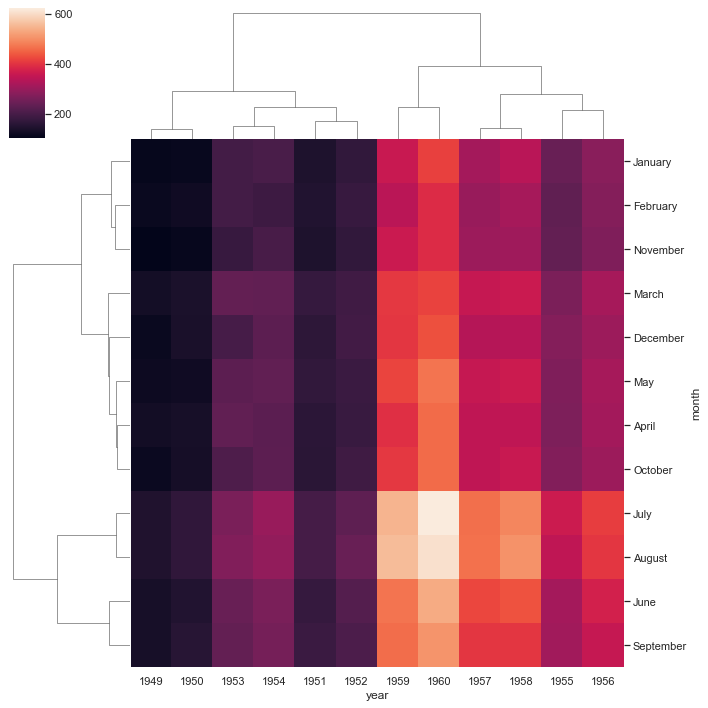

In [387]:
g1 = sn.clustermap(data = f2)

### With Corr Specified

In [389]:
tips = sn.load_dataset(name = 'tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [390]:
t1 = tips.corr()
t1

total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

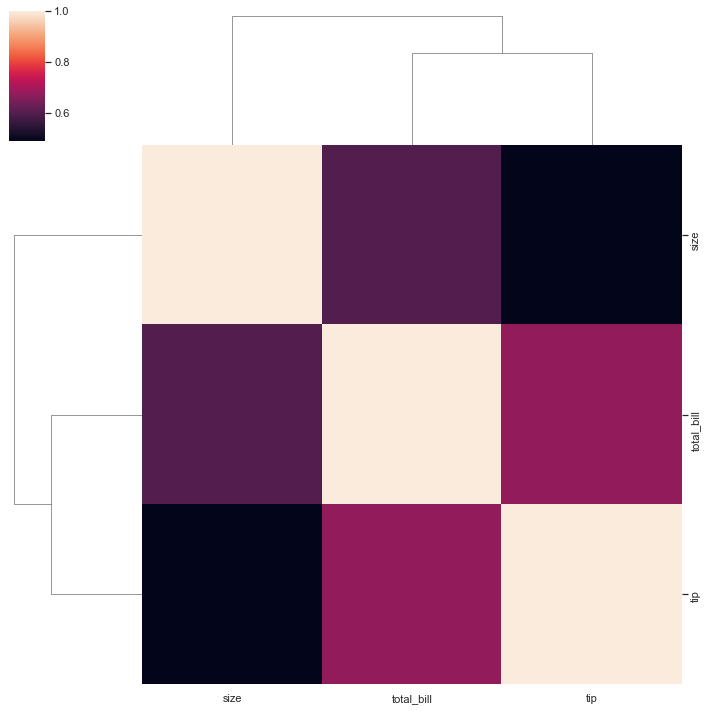

In [391]:
t2 = sn.clustermap(data = t1)